In [1]:
import json
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import copy

import dijkstra as dijk
import stacked_graph as sg
import testing as test
import graph_visualization as gv

# 1

In [2]:

# read_json_path = '/home/rjtomich/photonic_compiler/model_to_graph/gpt2_graph.json'
# # read_json_path = '/home/rjtomich/photonic_compiler/model_to_graph/bert-base-uncased_graph.json'
# # read_json_path = '/home/rjtomich/photonic_compiler/Pytorch-LeNet/simple_LeNet_graph.json'
# # read_json_path = '/home/rjtomich/photonic_compiler/Pytorch-LeNet/simple_LeNet_graph_NoFusion.json'
# with open(read_json_path)  as json_file:
#     raw_json = json.load(json_file) # returns json file as dict

# graph = sg.StackedGraph(raw_json=raw_json)

# subgraphs = list(dijk.graph_partition(graph))
# dijk.select_nodes(graph, subgraphs)


In [3]:
# groups = list(graph.get_node_groups(asap = False))
# print(test.group_validate(graph, groups))
# for group in groups:
#     print(group)


In [4]:
# n_graphs = len(groups)
# n_cols = 6  # Number of columns for the grid
# n_rows = (n_graphs + n_cols - 1) // n_cols  # Calculate the number of rows needed

# fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3, n_rows * 3))
# axes = axes.flatten()  # Flatten the array of axes


# for i in range(len(groups)):
#     if i >= 0:
#         test_group = groups[i]

#         start_stack = sg.StackedNode(0, [], [[]], [[]], opp='start', func_stack=['start'], cost_stack=[0])
#         first_stack = copy.deepcopy(graph.stack_list[graph.id_to_idx[test_group[0]]])
#         first_stack.parents = [0]

#         subgraph_stack_list = [start_stack, first_stack]
#         for stack_id in test_group[1:]:
#             stack = graph.stack_list[graph.id_to_idx[stack_id]]
#             new_node = copy.deepcopy(stack)
#             new_node.parents = set(new_node.parents) - graph.load_nodes
#             subgraph_stack_list.append(new_node)


#         new_graph = sg.StackedGraph(stack_list=subgraph_stack_list)
#         # gv.adj_to_graph(new_graph.adj_matrix, save=False, layout = 'spectral')
#         # gv.adj_to_graph(new_graph, save=False, layout = 'kk', title = f'Subgraph {i}')
#         gv.adj_to_graph(new_graph, ax=axes[i], layout='kk', title=f'Subgraph {i+1}')


# for j in range(i + 1, len(axes)):
#     fig.delaxes(axes[j])


# plt.tight_layout()
# plt.show()


# 2 Graph Visualization

In [5]:
subgraph_to_plot = 3


# read_json_path = '/home/rjtomich/photonic_compiler/model_to_graph/gpt2_graph.json'
read_json_path = '/home/rjtomich/photonic_compiler/model_to_graph/bert-base-uncased_graph.json'
# read_json_path = '/home/rjtomich/photonic_compiler/Pytorch-LeNet/simple_LeNet_graph.json'
# read_json_path = '/home/rjtomich/photonic_compiler/Pytorch-LeNet/simple_LeNet_graph_NoFusion.json'
with open(read_json_path)  as json_file:
    raw_json = json.load(json_file) # returns json file as dict
graph = sg.StackedGraph(raw_json=raw_json)


subgraphs = list(dijk.graph_partition(graph))
dijk.select_nodes(graph, subgraphs)

In [6]:
def draw_subgraphs(graph, sub=0):
    subgraphs = list(dijk.graph_partition(graph))
    dijk.select_nodes(graph, subgraphs)

    if sub == 'all':
        n_graphs = len(subgraphs)
        n_cols = 6  # Number of columns for the grid
        n_rows = (n_graphs + n_cols - 1) // n_cols  # Calculate the number of rows needed

        fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3, n_rows * 3))
        axes = axes.flatten()  # Flatten the array of axes

        for i in range(len(subgraphs)):
            gv.adj_to_graph(subgraphs[i], ax=axes[i], layout='kk', title=f'Subgraph {i+1}')

        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

    else:
        fig, ax = plt.subplots(figsize=(6, 6))
        gv.adj_to_graph(subgraphs[sub], ax=ax, layout='kk', title=f'Subgraph {sub}')


    plt.tight_layout()
    plt.show()

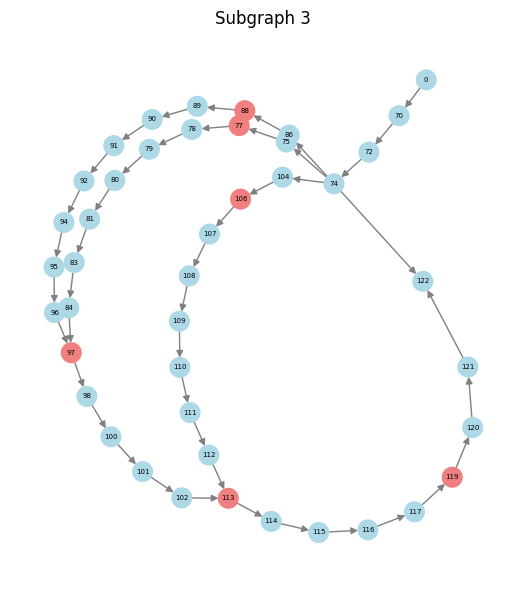

In [7]:
# draw_subgraphs(graph)
# draw_subgraphs(graph)
draw_subgraphs(graph, sub=subgraph_to_plot)
# draw_subgraphs(graph, sub='all')

# 3 Timeline Visualization

{'memory', 'CPU0', 'PHU0'}
{'memory', 'CPU0', 'PHU0'}


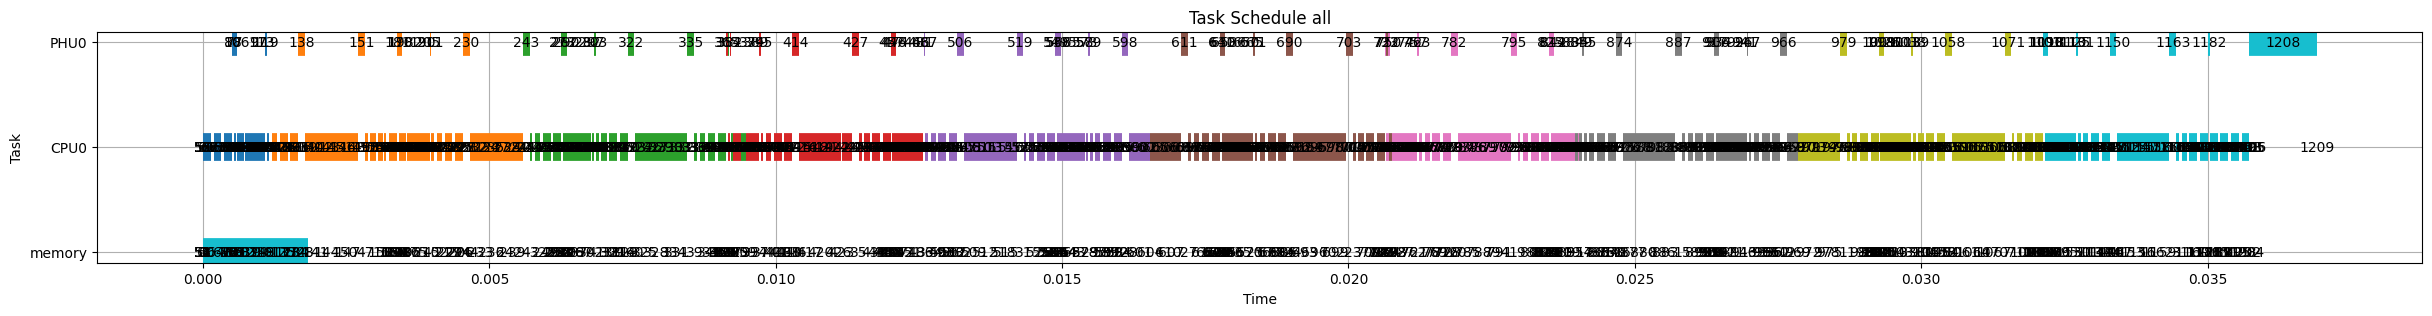

0
1.7999999999999997e-07 - 0.00018508
{'memory', 'CPU0', 'PHU0'}


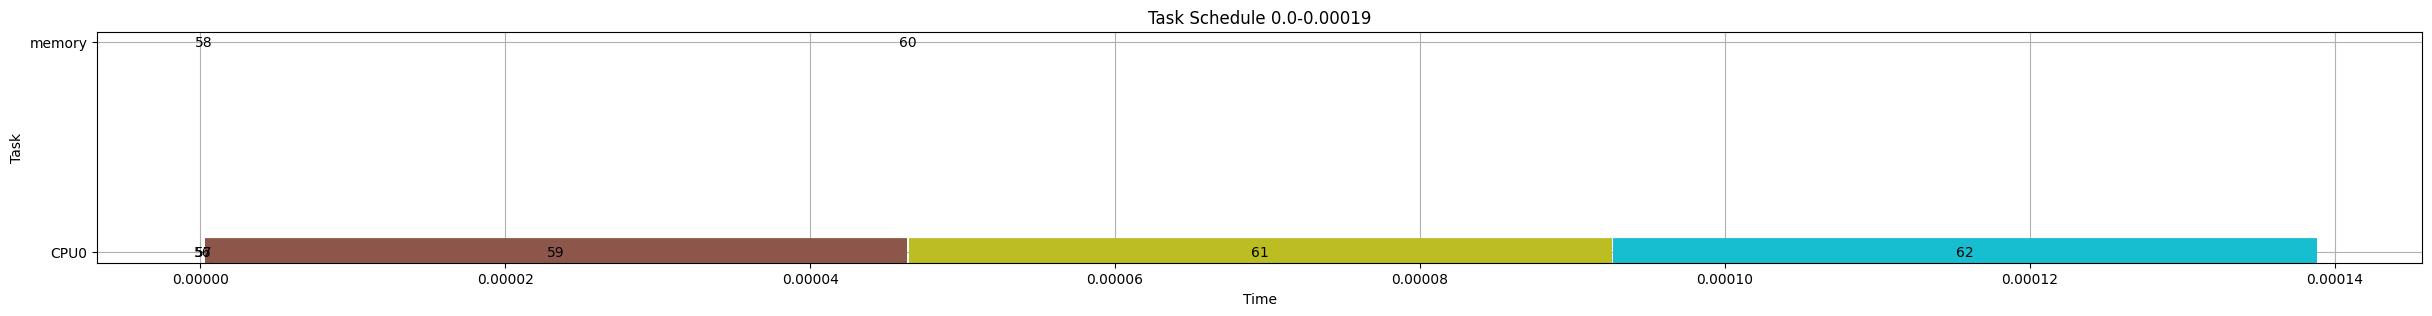

1
0.00018508 - 0.00037008000000000006
{'memory', 'CPU0', 'PHU0'}


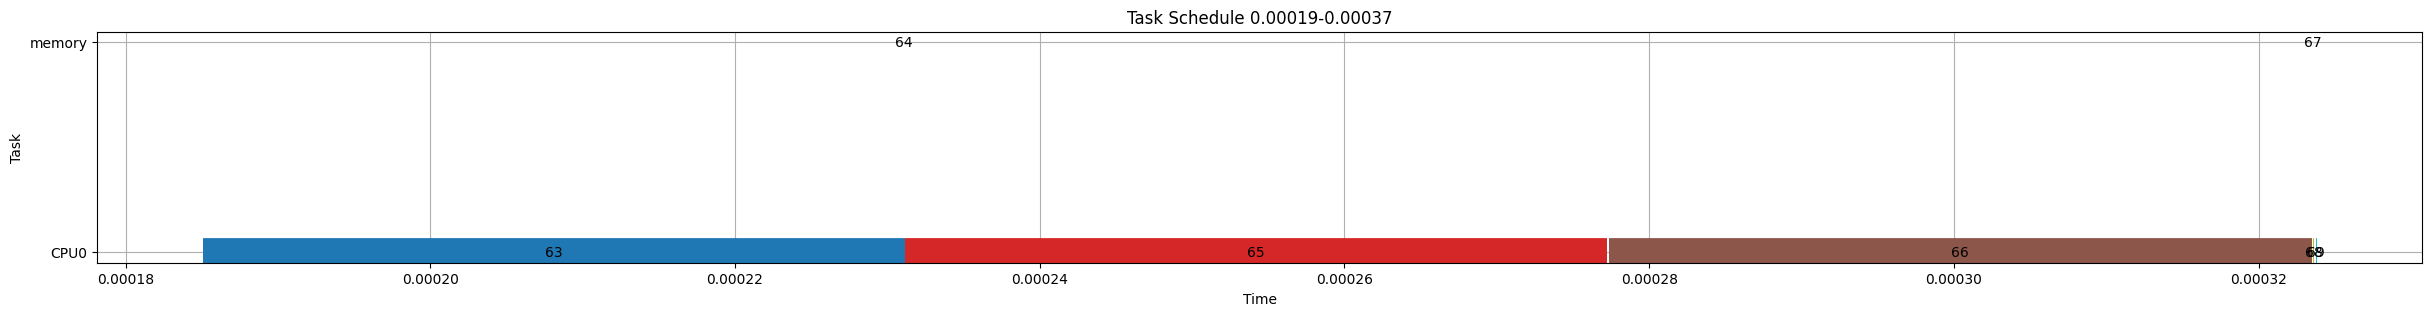

2
0.00037008000000000006 - 0.0012038848000000006
{'memory', 'CPU0', 'PHU0'}


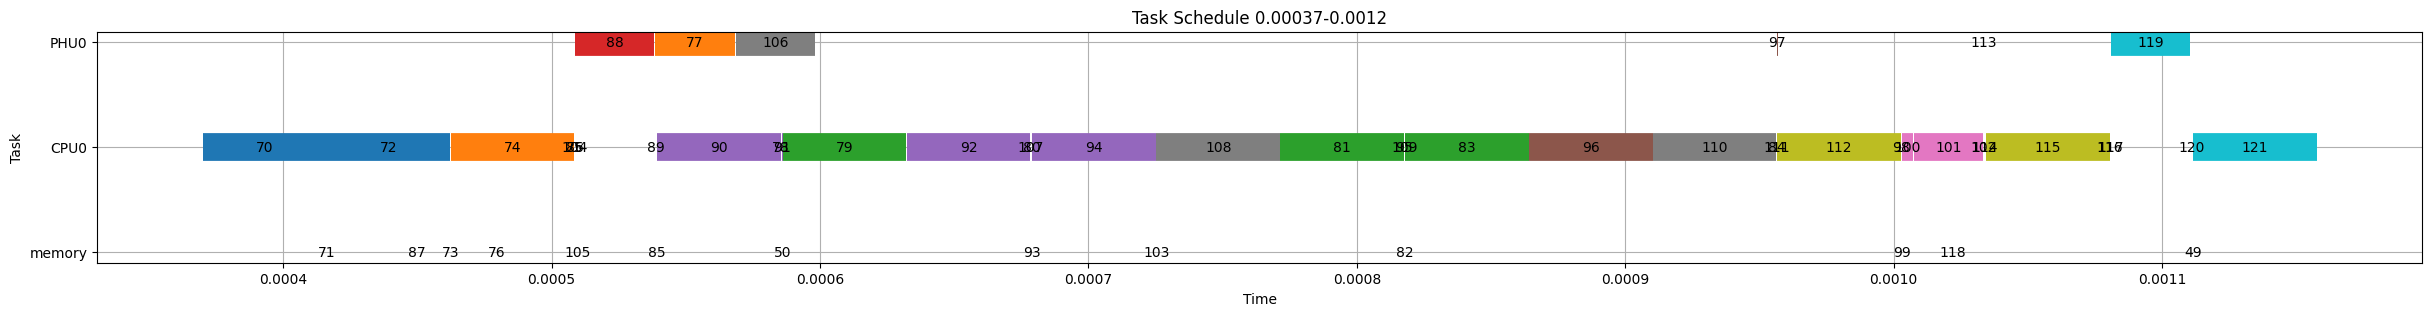

3
0.0012038848000000006 - 0.0013423848000000006
{'memory', 'CPU0', 'PHU0'}


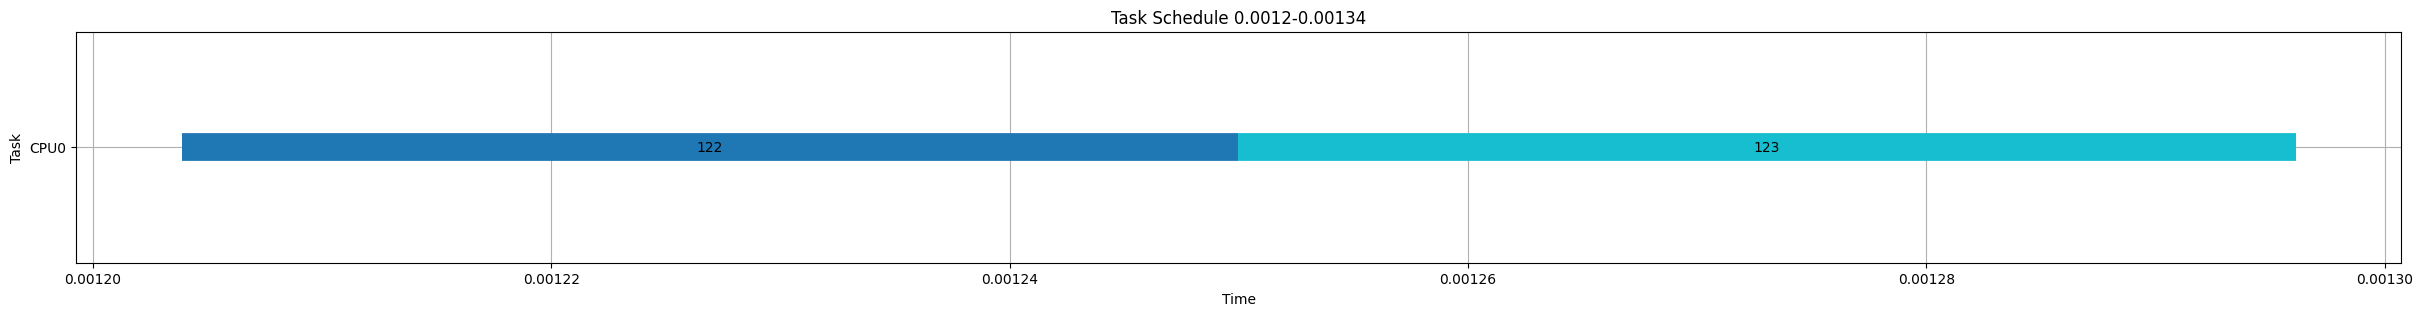

4
0.0013423848000000006 - 0.0015273848000000004
{'memory', 'CPU0', 'PHU0'}


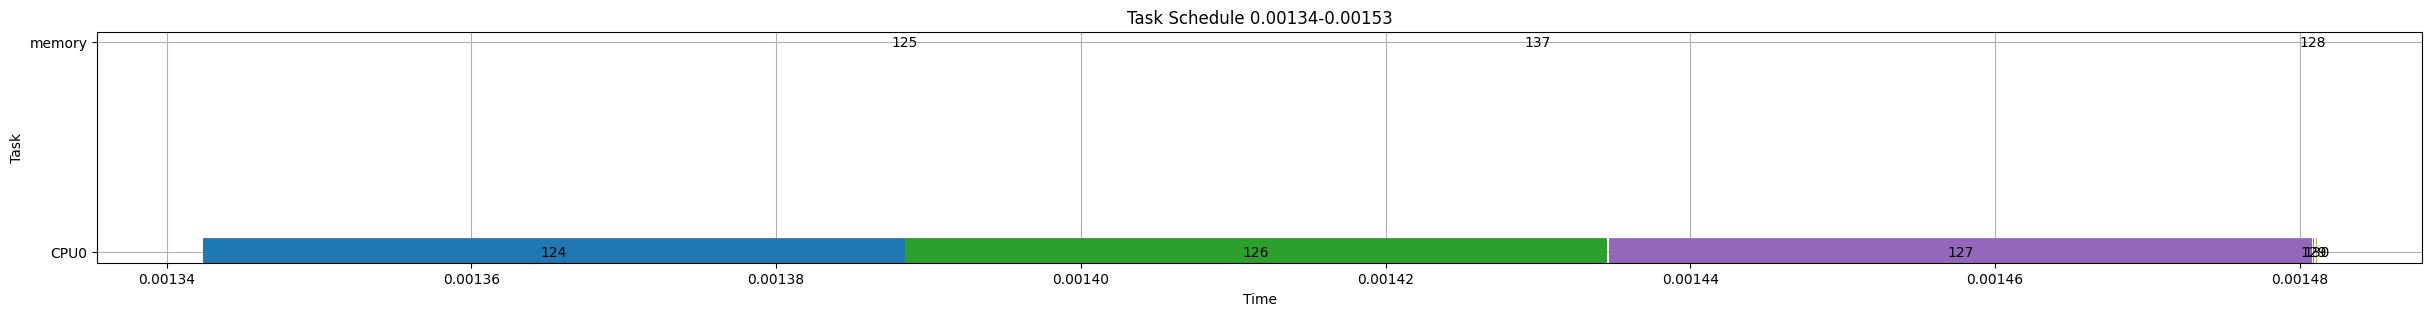

5
0.0015273848000000004 - 0.0029215723999999996
{'memory', 'CPU0', 'PHU0'}


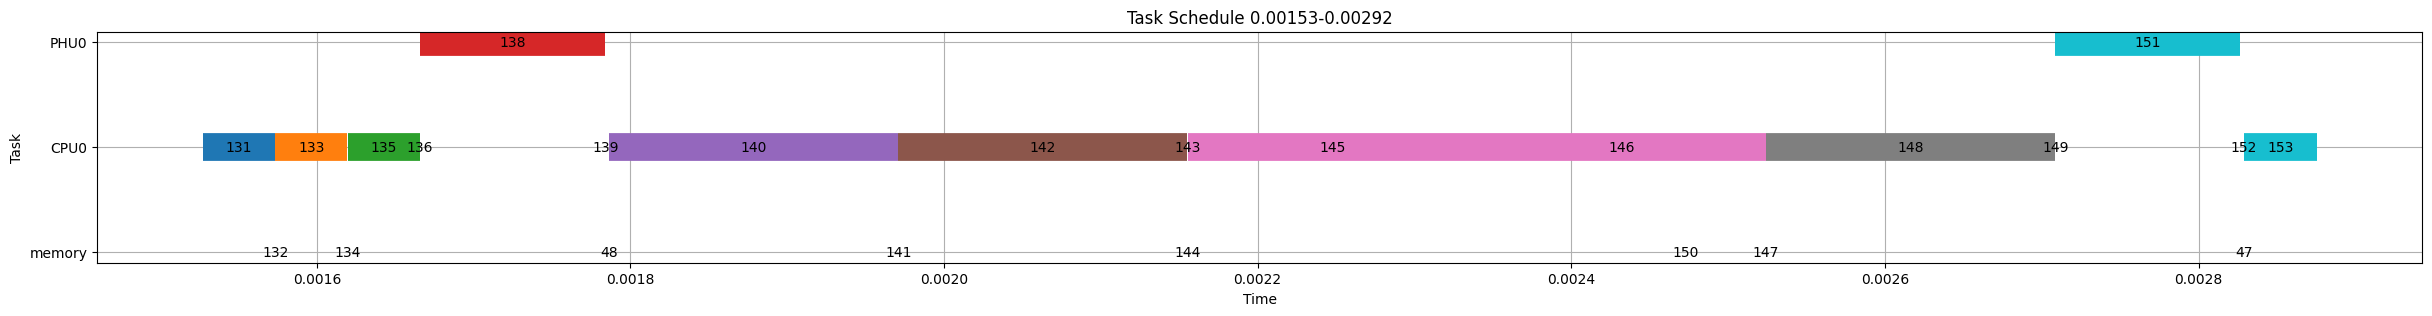

6
0.0029215723999999996 - 0.0030600723999999993
{'memory', 'CPU0', 'PHU0'}


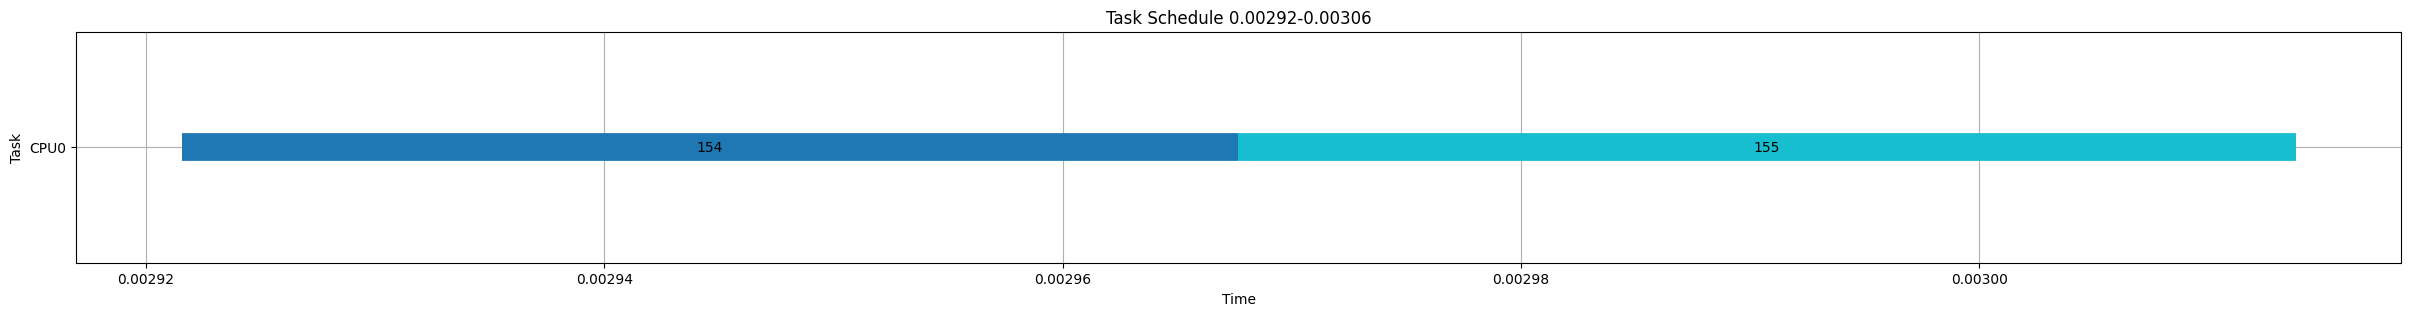

7
0.0030600723999999993 - 0.0032450723999999987
{'memory', 'CPU0', 'PHU0'}


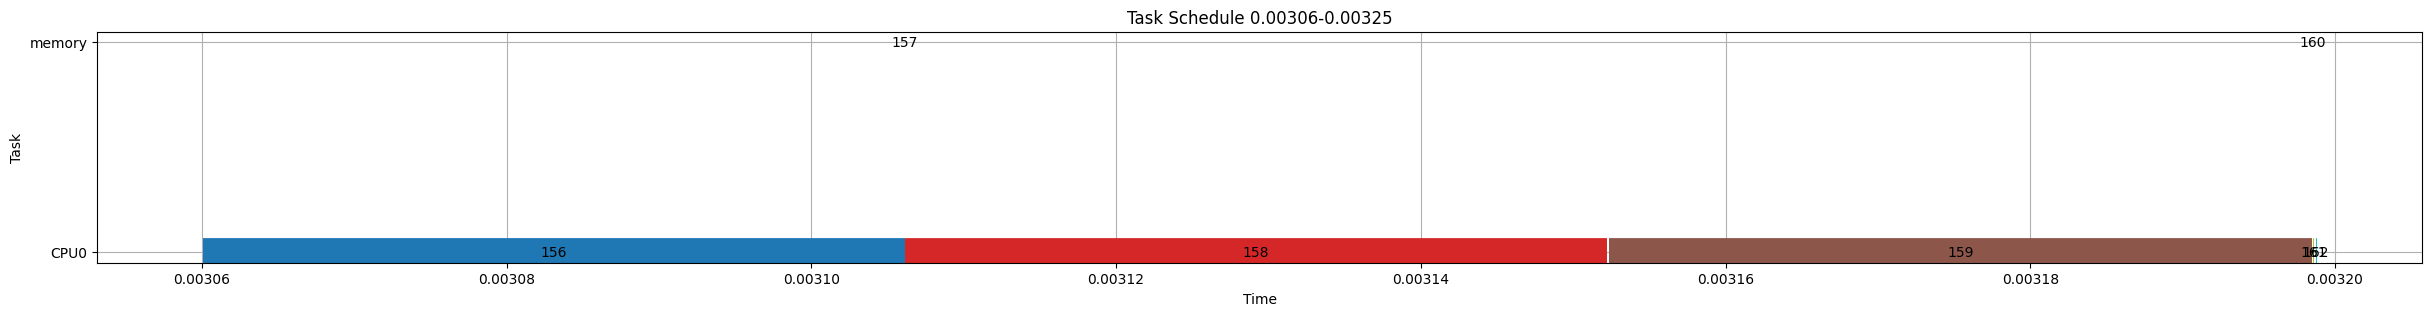

8
0.0032450723999999987 - 0.004078877199999999
{'memory', 'CPU0', 'PHU0'}


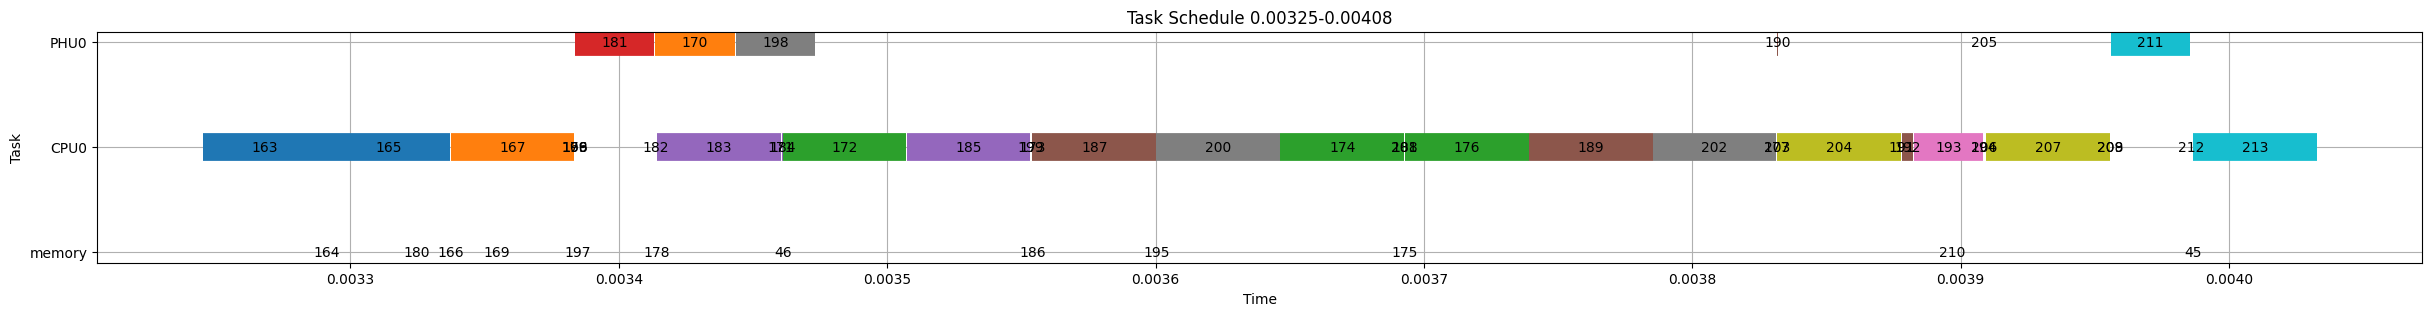

9
0.004078877199999999 - 0.0042173772
{'memory', 'CPU0', 'PHU0'}


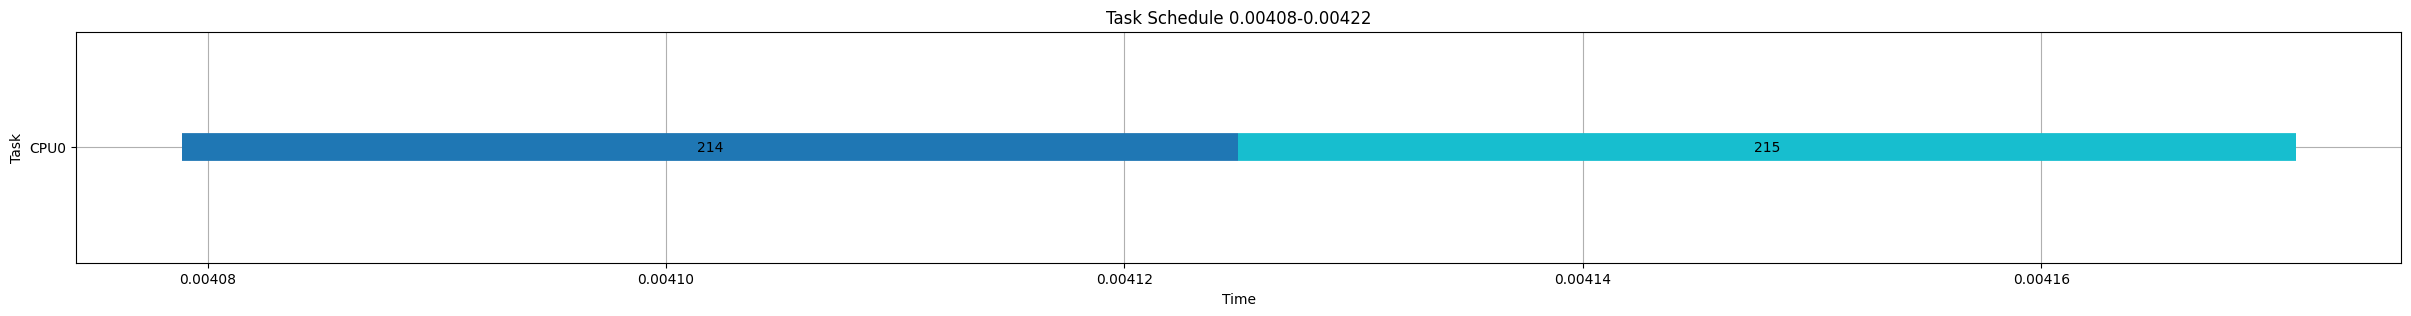

10
0.0042173772 - 0.0044023772
{'memory', 'CPU0', 'PHU0'}


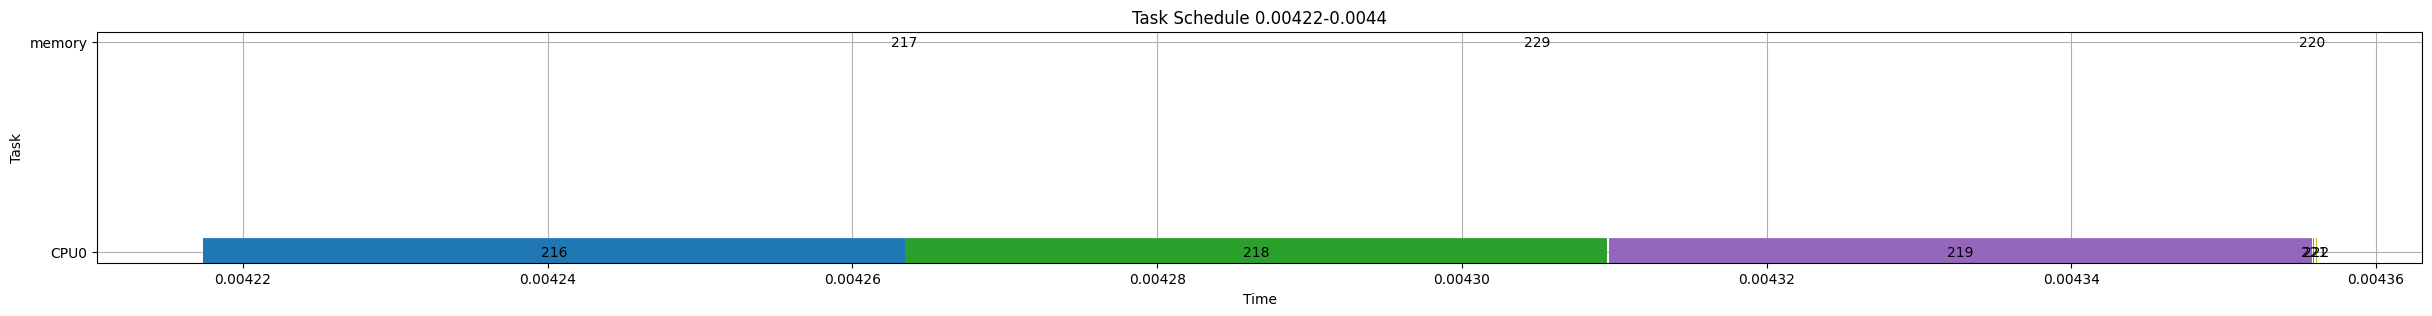

11
0.0044023772 - 0.005796564800000002
{'memory', 'CPU0', 'PHU0'}


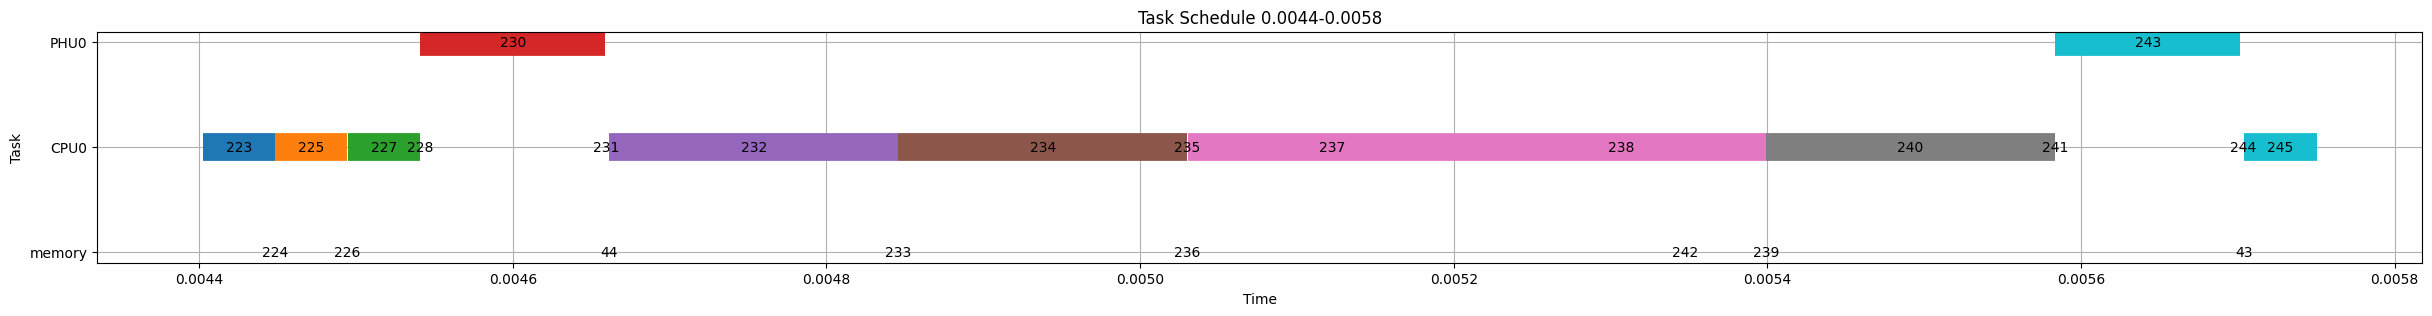

12
0.005796564800000002 - 0.005935064800000002
{'memory', 'CPU0', 'PHU0'}


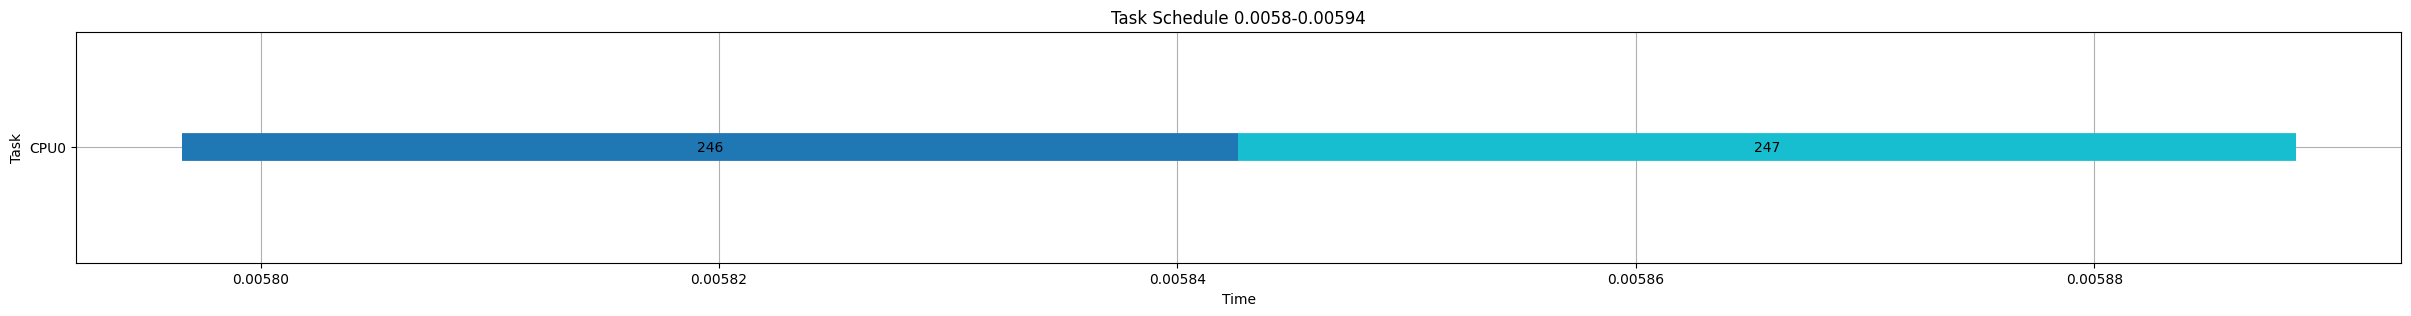

13
0.005935064800000002 - 0.006120064800000003
{'memory', 'CPU0', 'PHU0'}


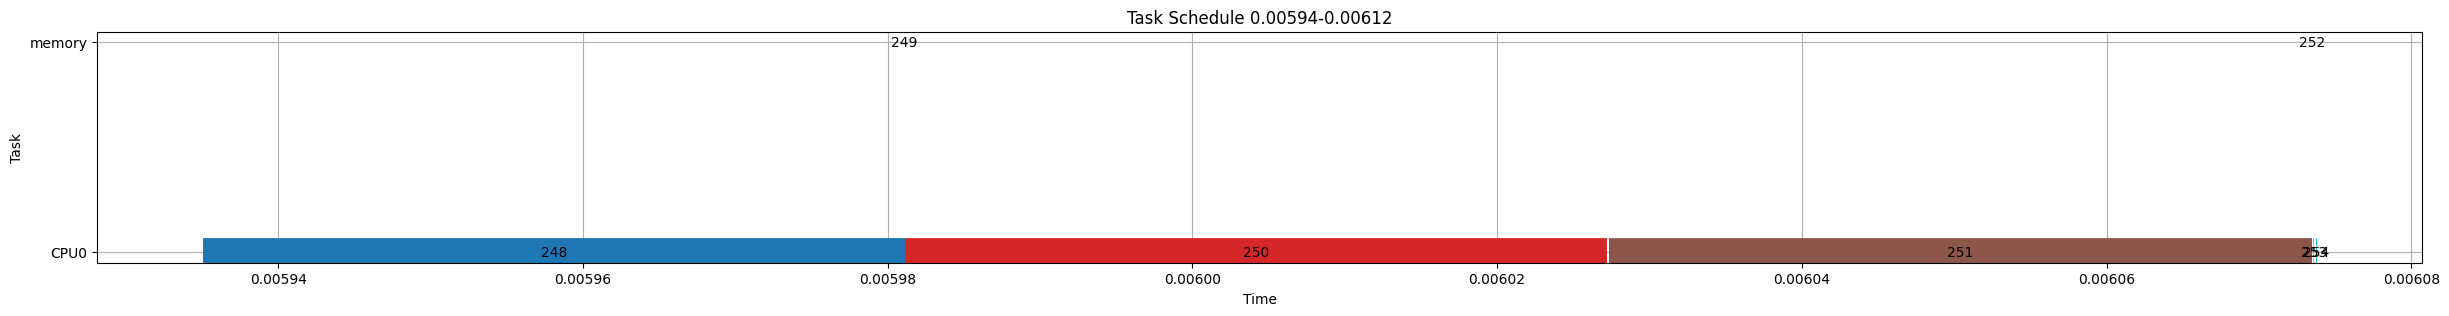

14
0.006120064800000003 - 0.006953869600000004
{'memory', 'CPU0', 'PHU0'}


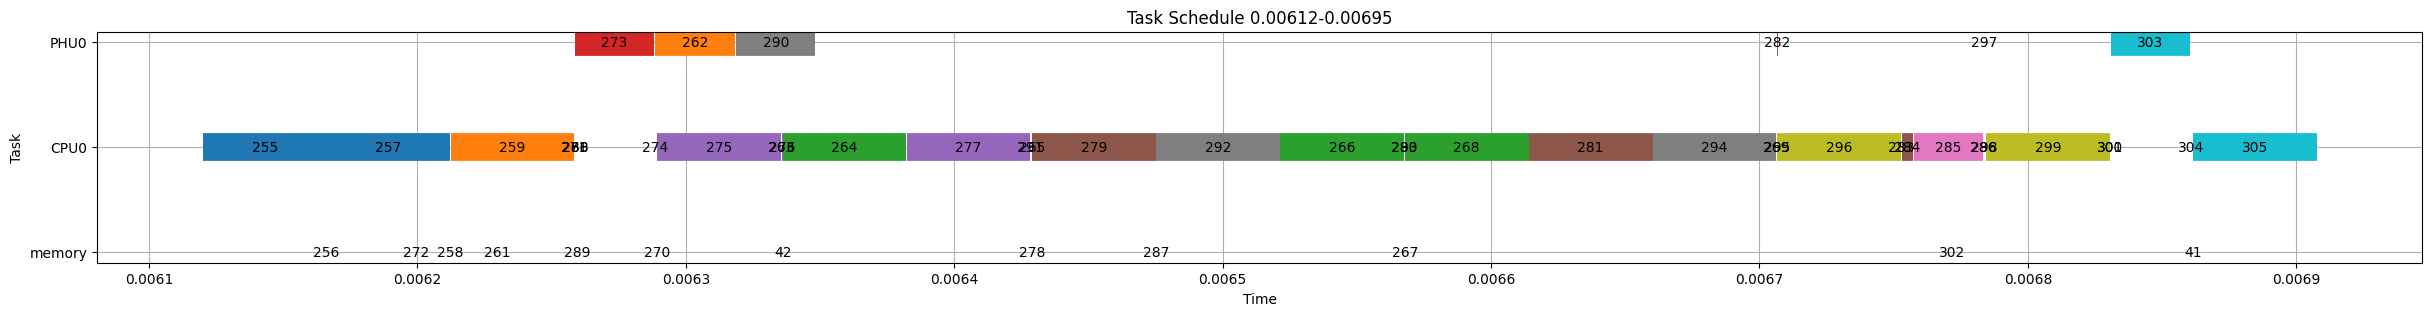

15
0.006953869600000004 - 0.007092369600000005
{'memory', 'CPU0', 'PHU0'}


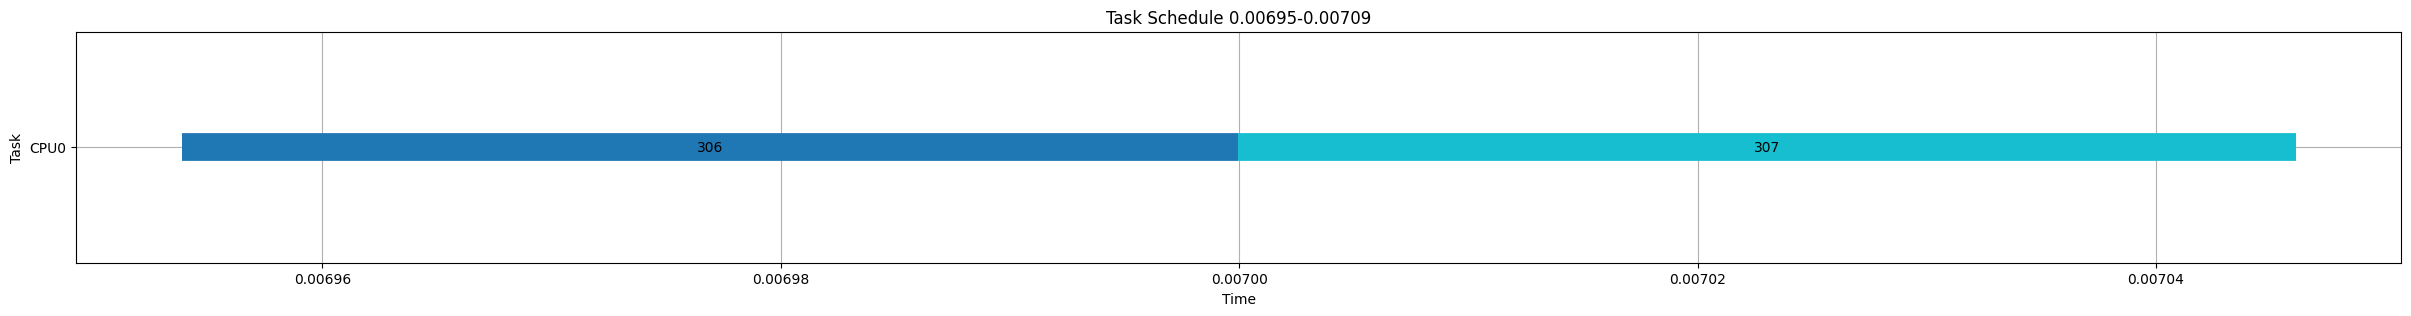

16
0.007092369600000005 - 0.007277369600000005
{'memory', 'CPU0', 'PHU0'}


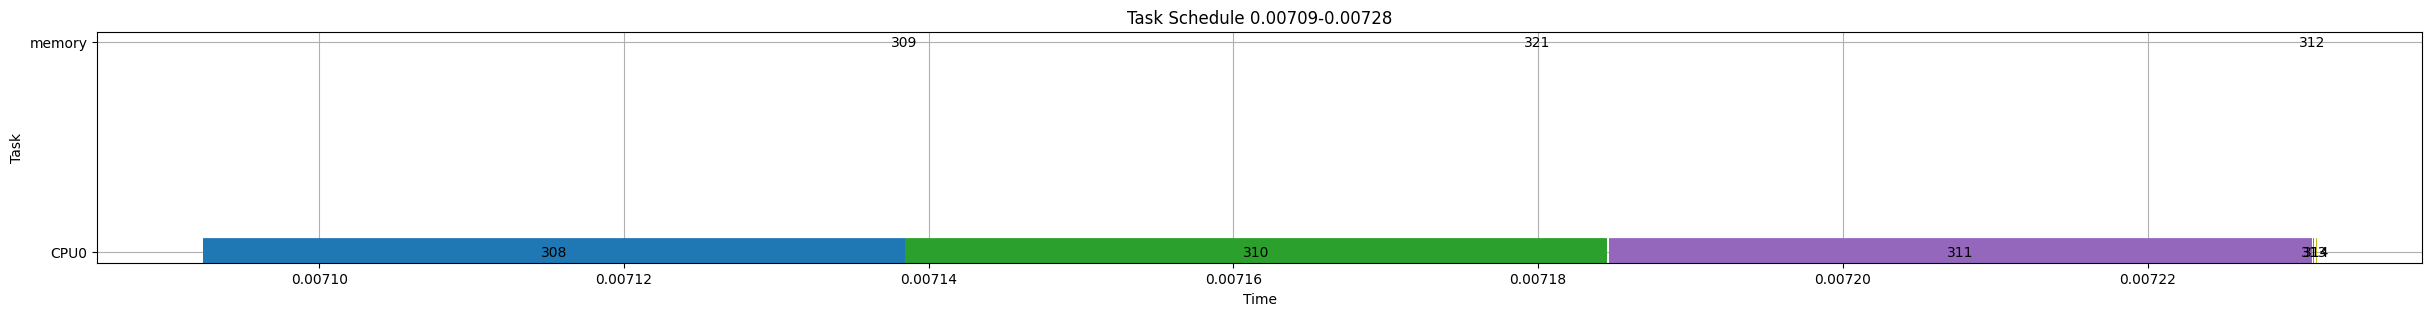

17
0.007277369600000005 - 0.008671557200000003
{'memory', 'CPU0', 'PHU0'}


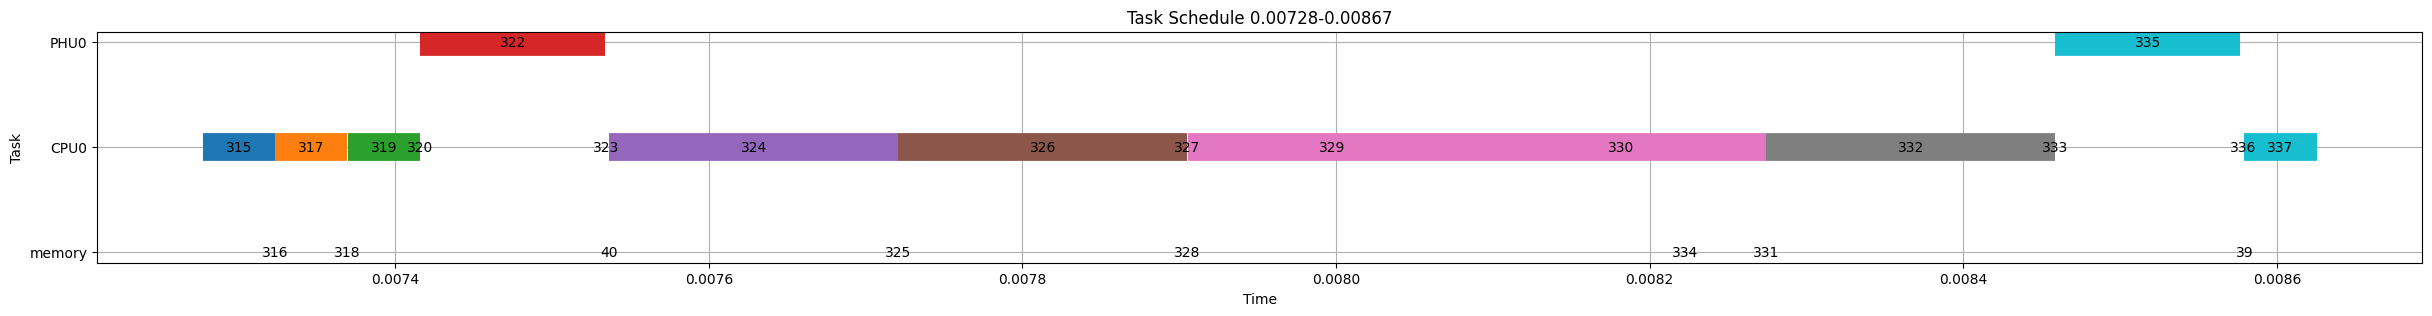

18
0.008671557200000003 - 0.008810057200000002
{'memory', 'CPU0', 'PHU0'}


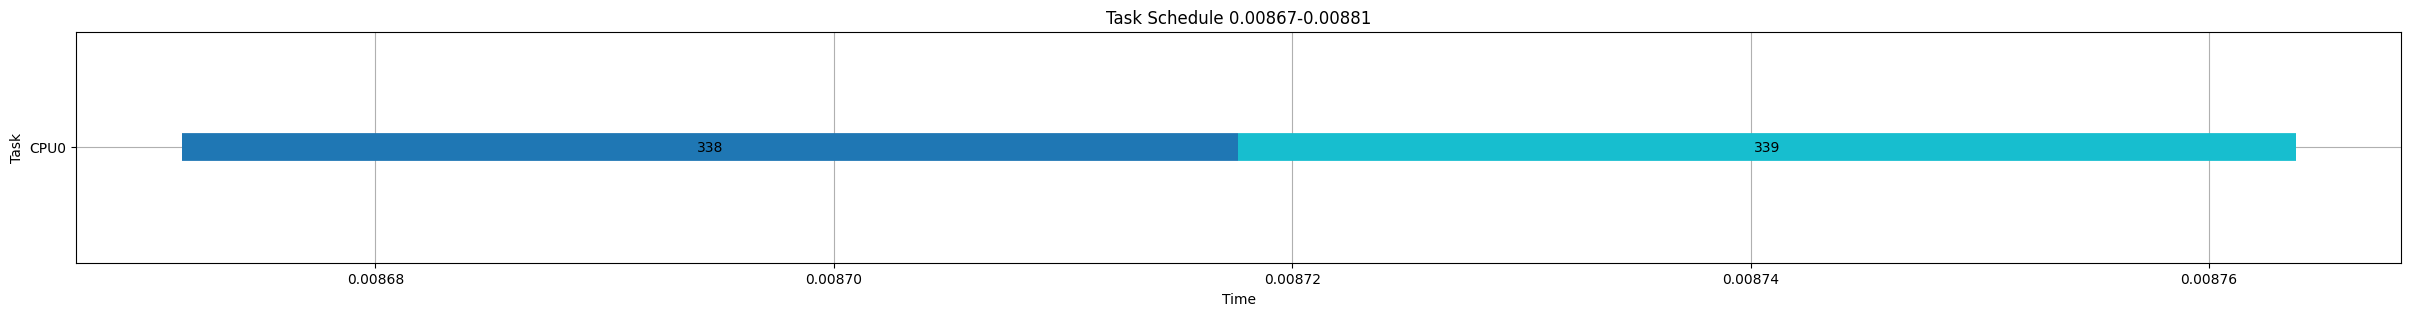

19
0.008810057200000002 - 0.008995057200000003
{'memory', 'CPU0', 'PHU0'}


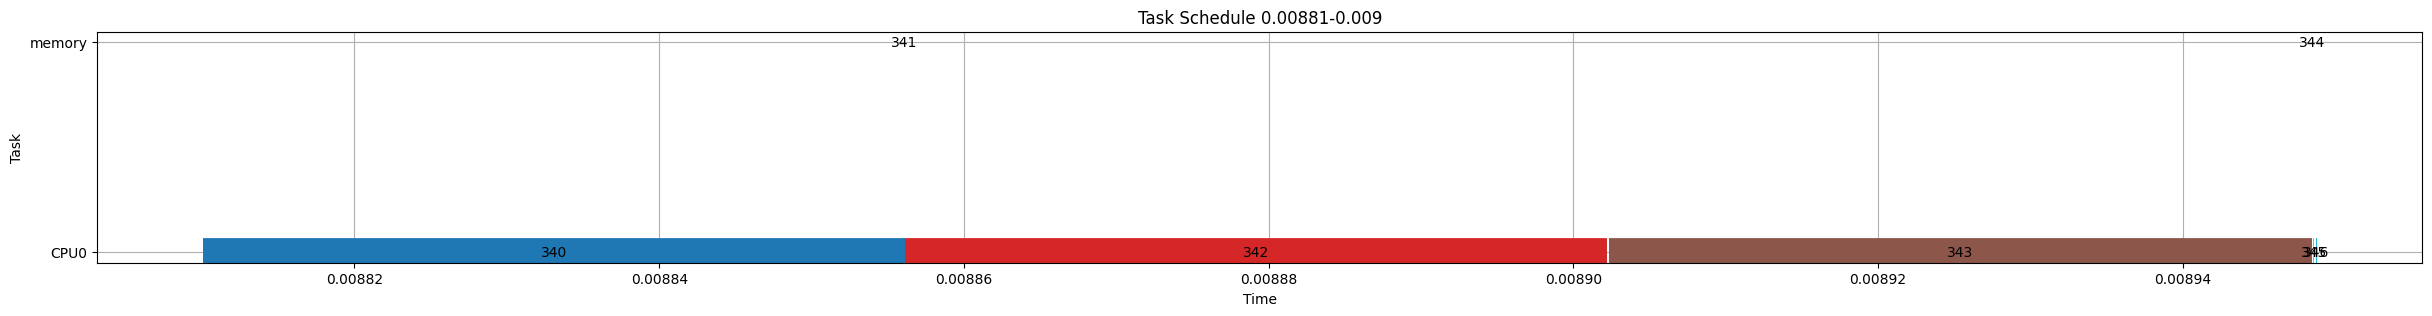

20
0.008995057200000003 - 0.009828861999999996
{'memory', 'CPU0', 'PHU0'}


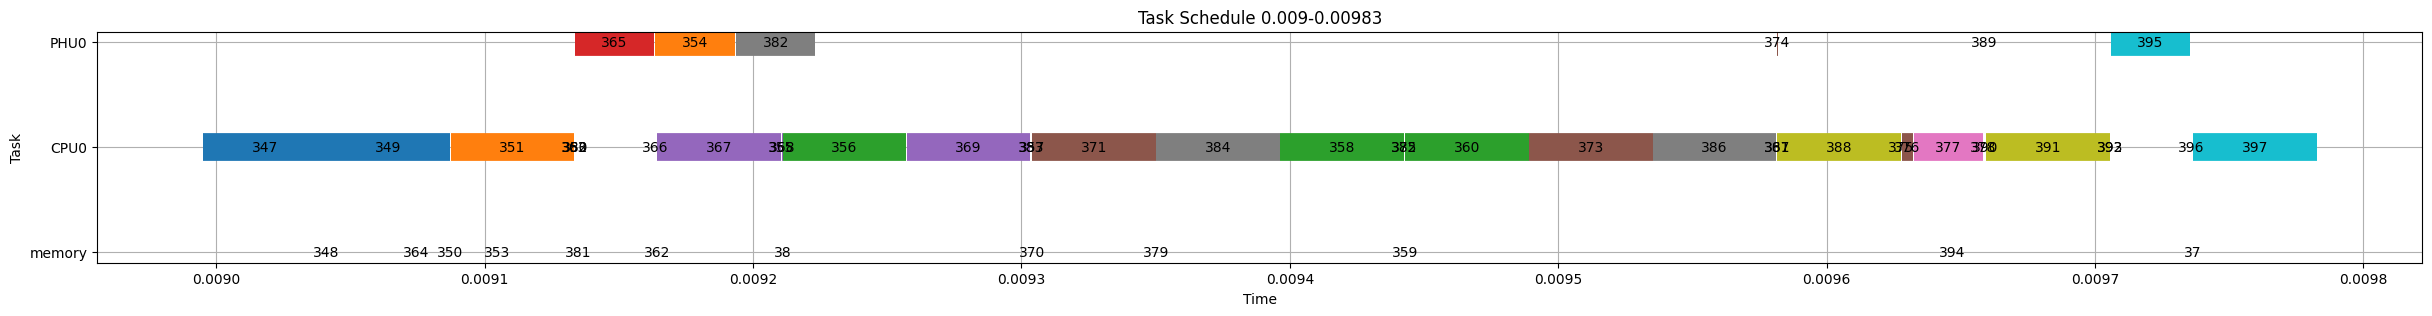

21
0.009828861999999996 - 0.009967361999999995
{'memory', 'CPU0', 'PHU0'}


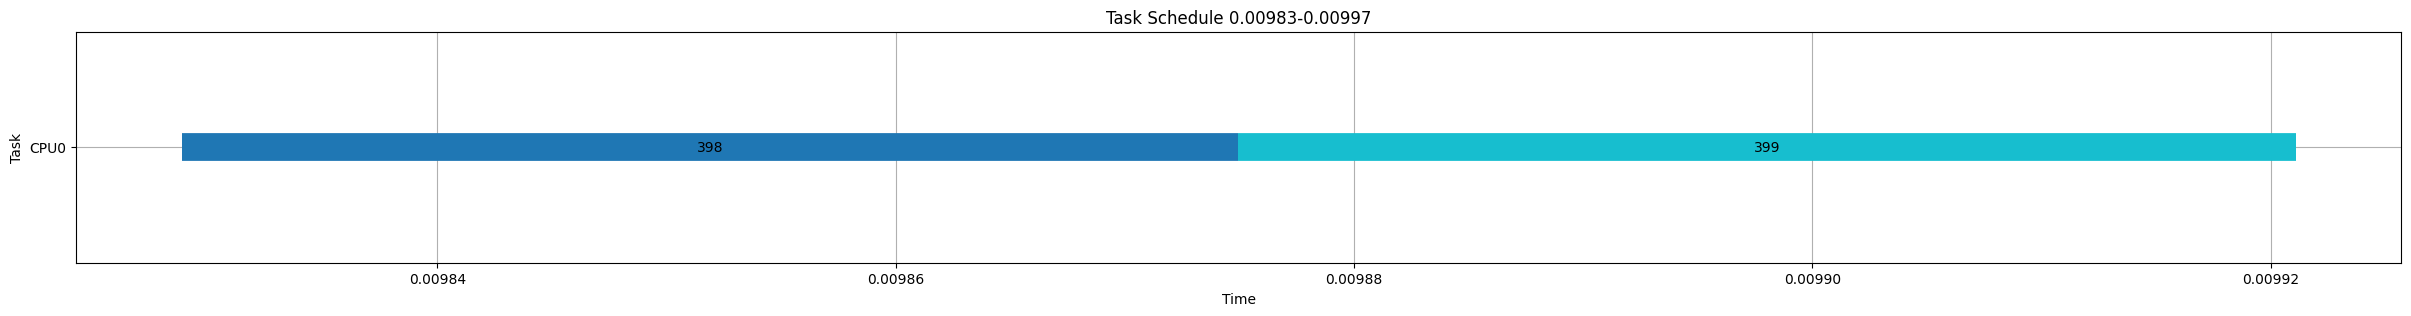

22
0.009967361999999995 - 0.010152361999999996
{'memory', 'CPU0', 'PHU0'}


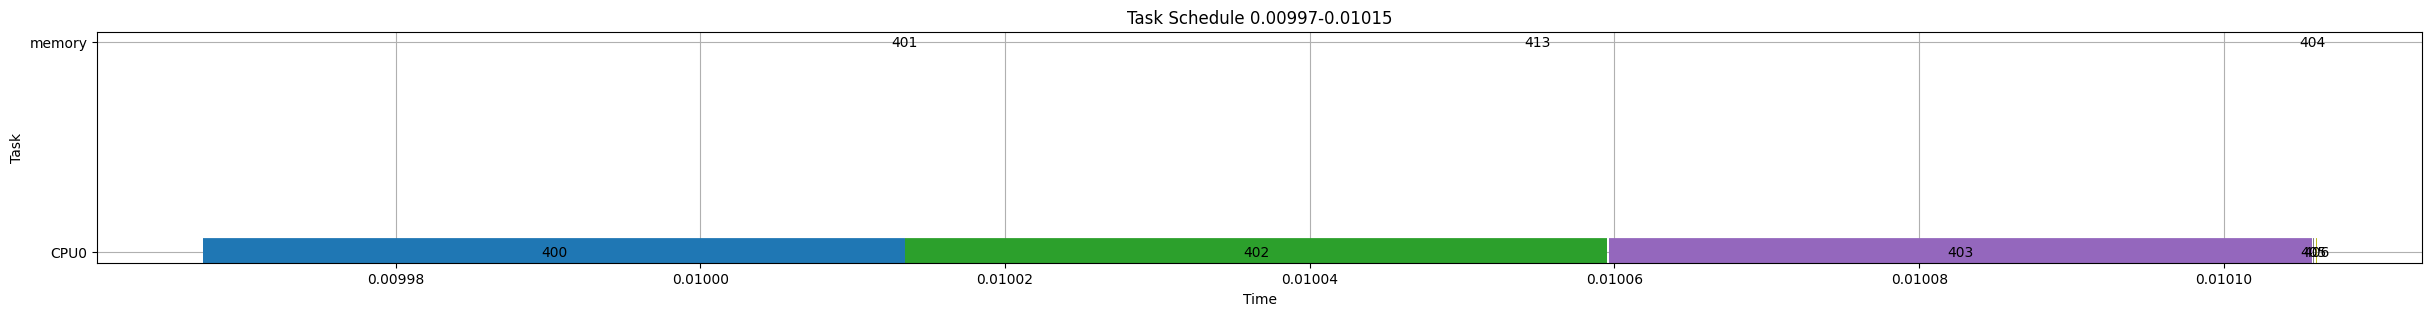

23
0.010152361999999996 - 0.011546549599999992
{'memory', 'CPU0', 'PHU0'}


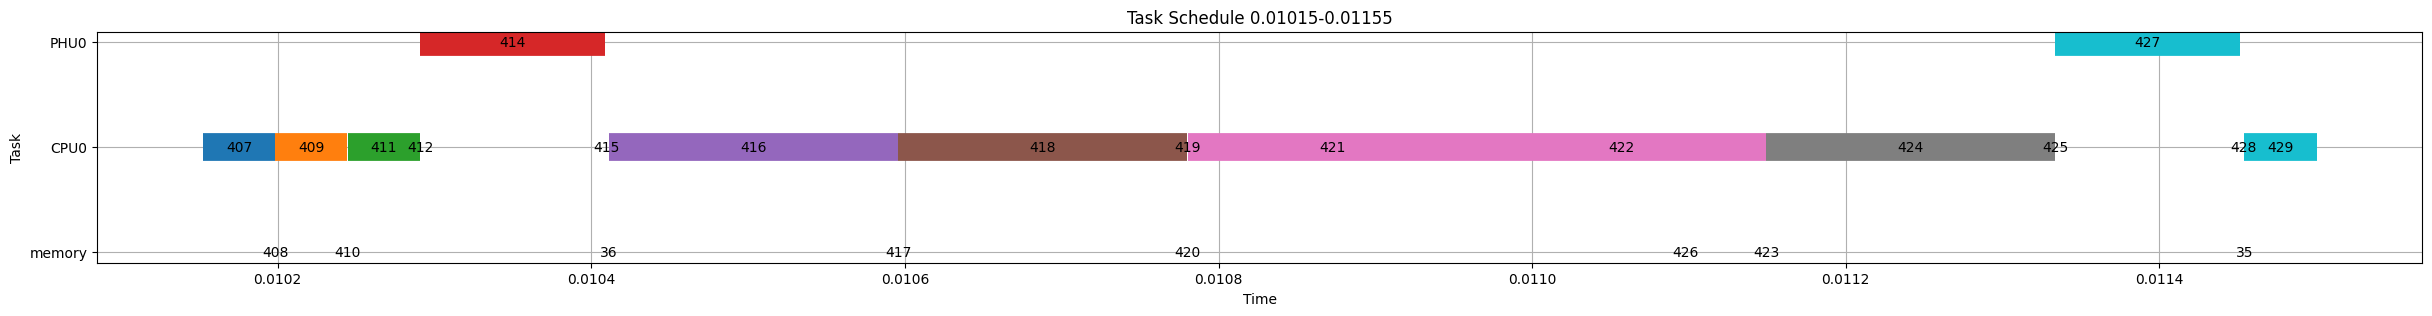

24
0.011546549599999992 - 0.011685049599999992
{'memory', 'CPU0', 'PHU0'}


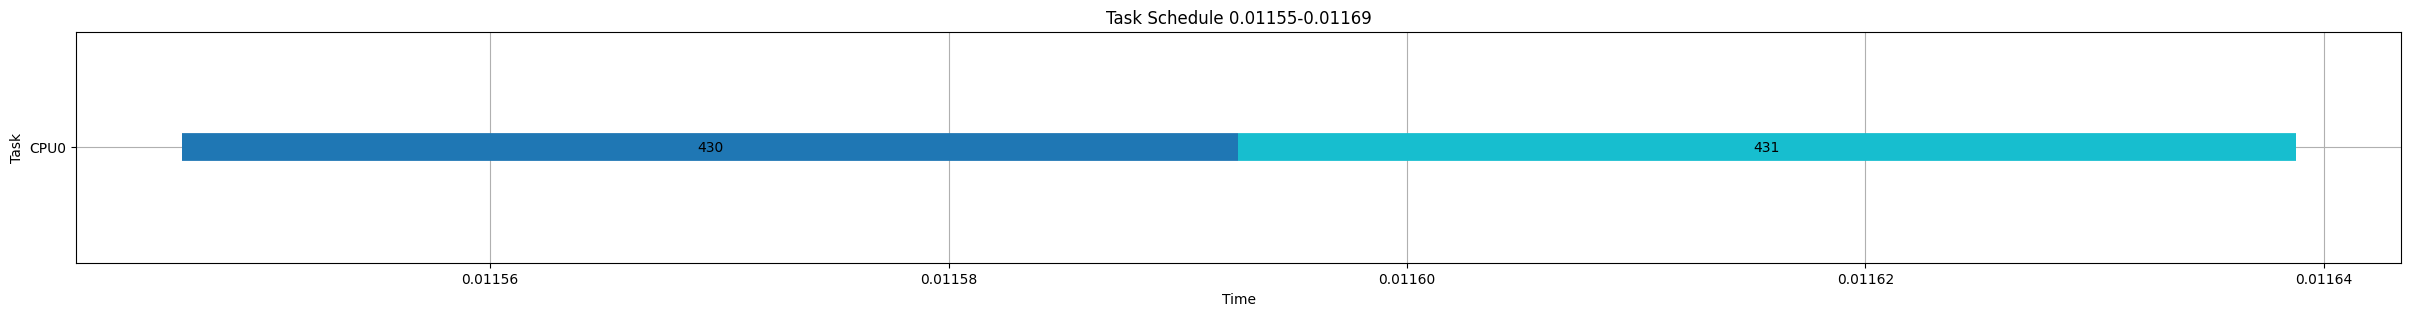

25
0.011685049599999992 - 0.011870049599999993
{'memory', 'CPU0', 'PHU0'}


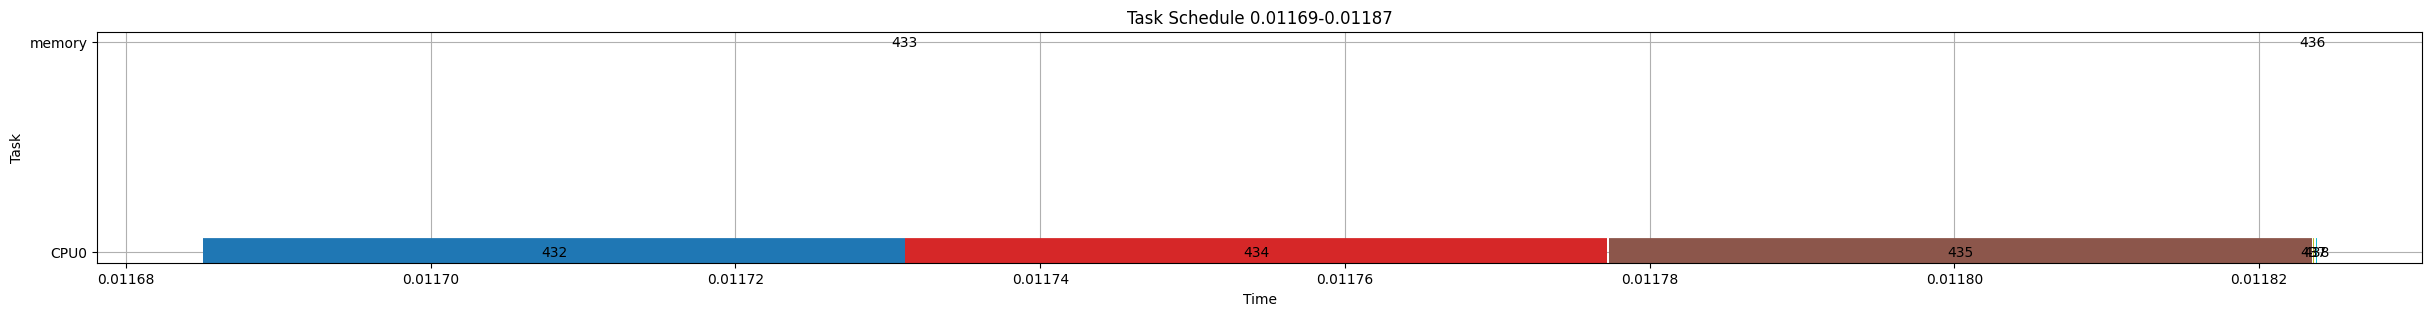

26
0.011870049599999993 - 0.012703854399999985
{'memory', 'CPU0', 'PHU0'}


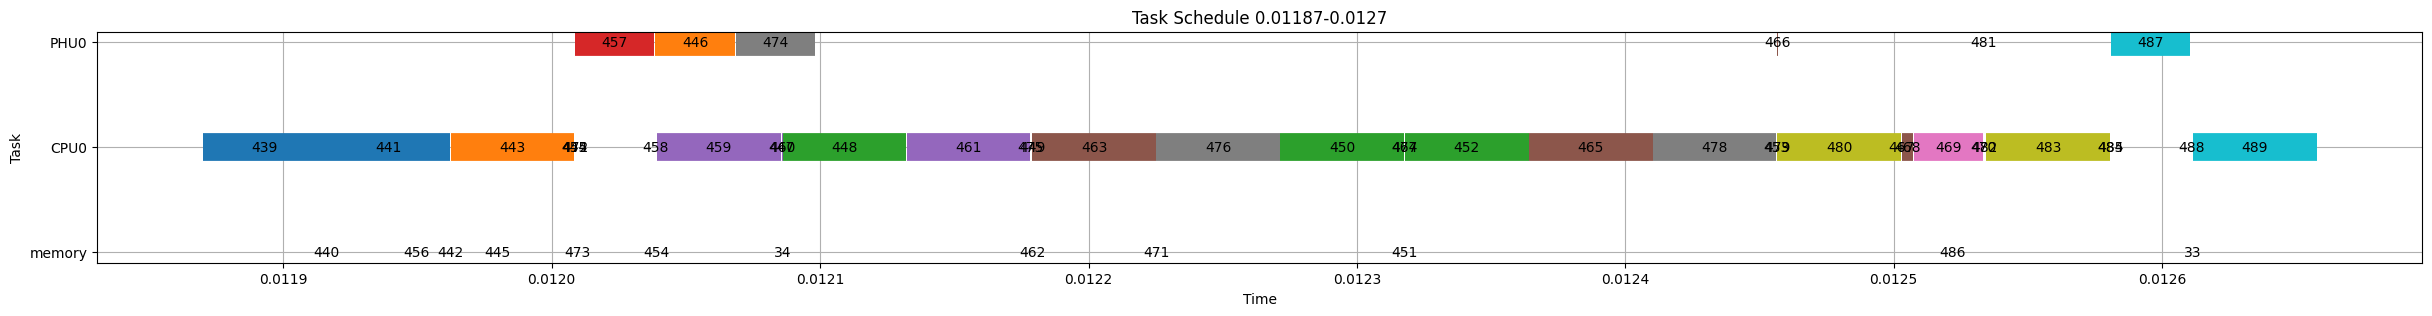

27
0.012703854399999985 - 0.012842354399999985
{'memory', 'CPU0', 'PHU0'}


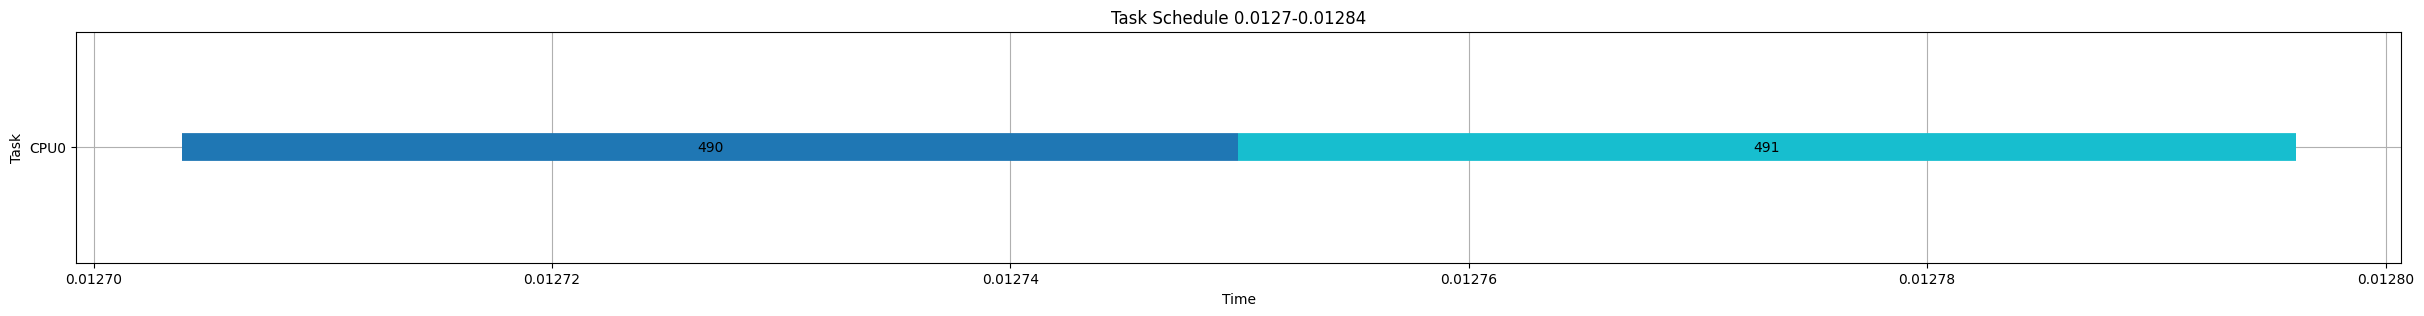

28
0.012842354399999985 - 0.013027354399999986
{'memory', 'CPU0', 'PHU0'}


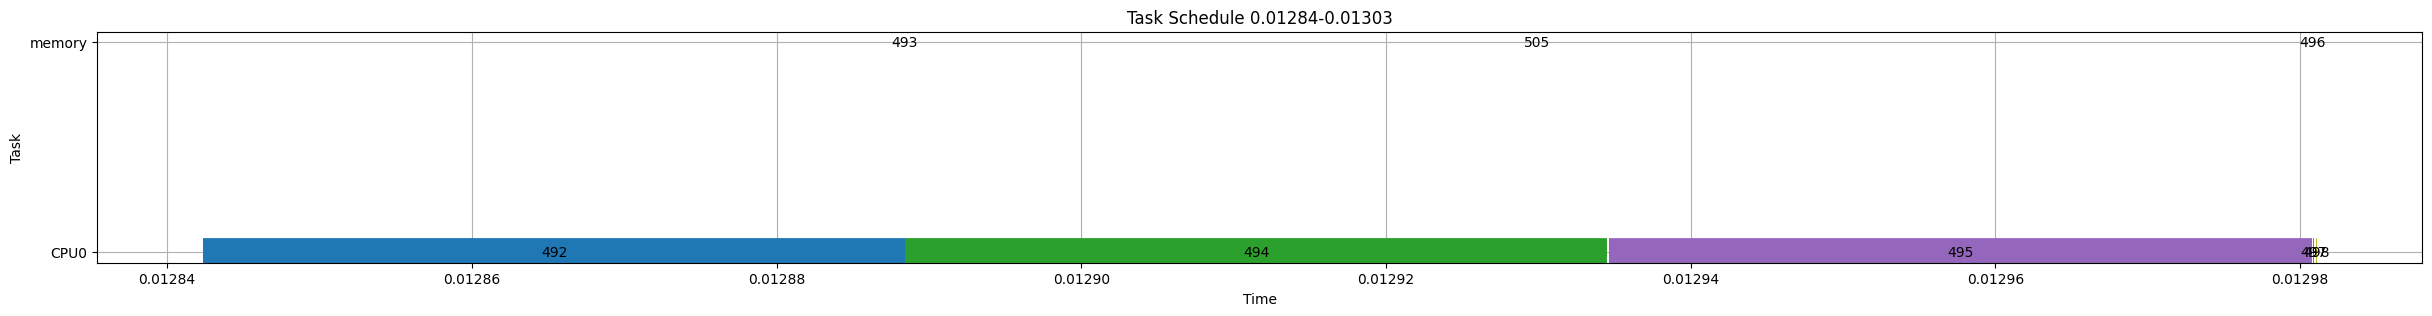

29
0.013027354399999986 - 0.014421541999999982
{'memory', 'CPU0', 'PHU0'}


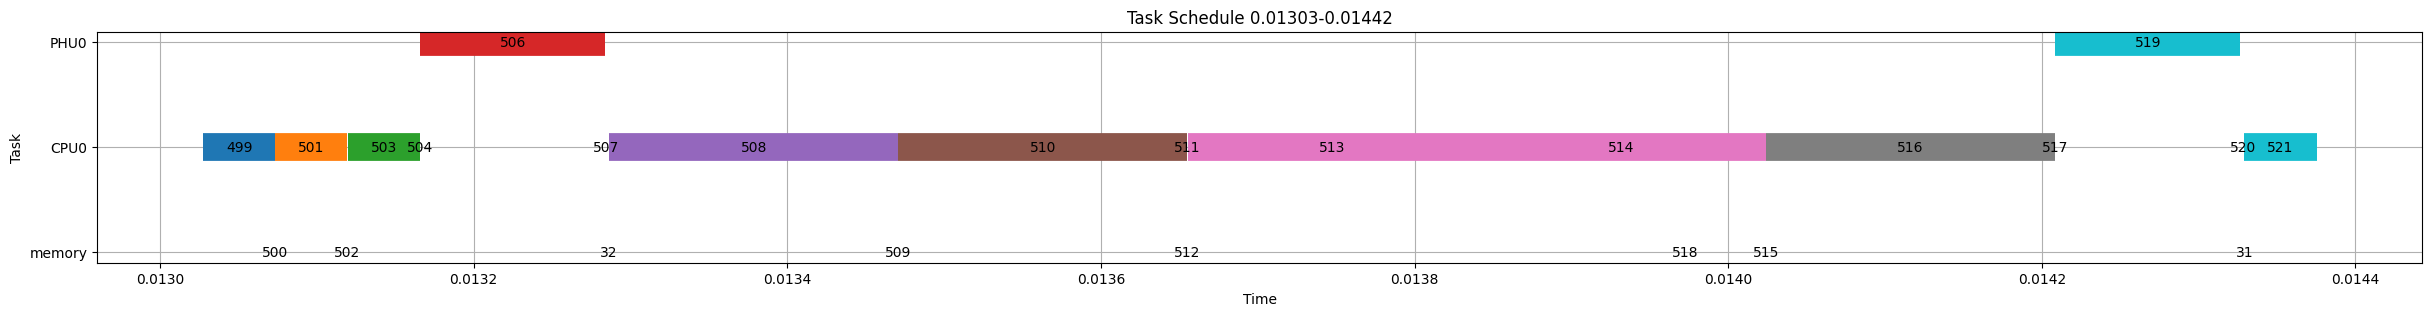

30
0.014421541999999982 - 0.014560041999999981
{'memory', 'CPU0', 'PHU0'}


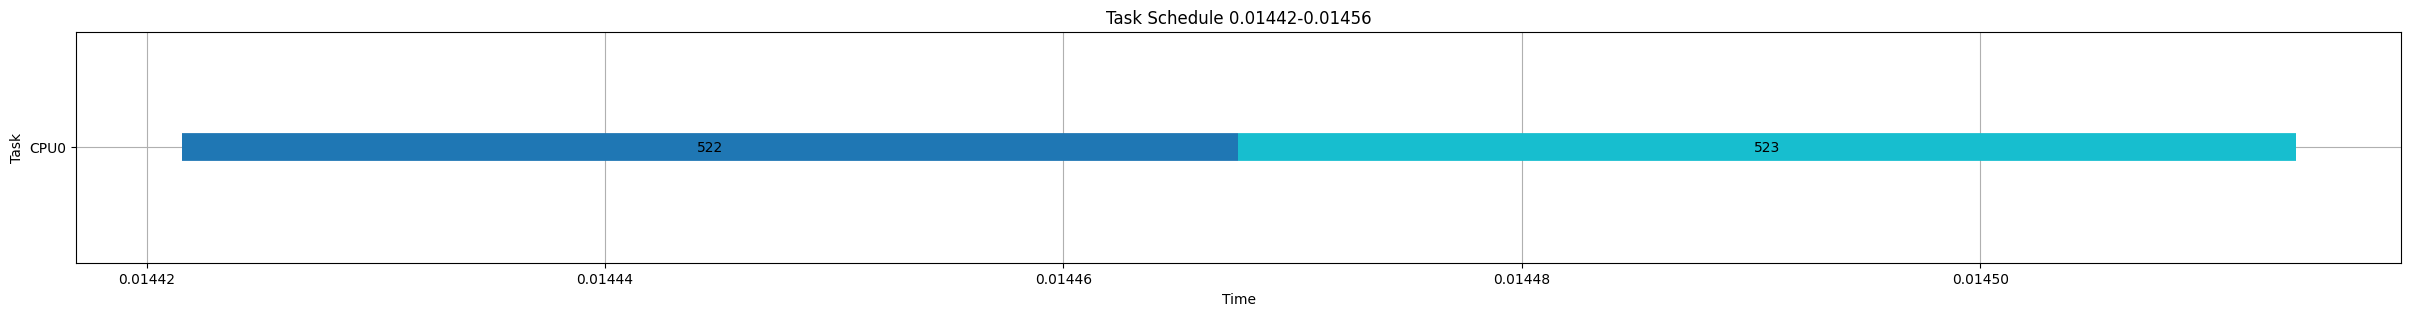

31
0.014560041999999981 - 0.014745041999999983
{'memory', 'CPU0', 'PHU0'}


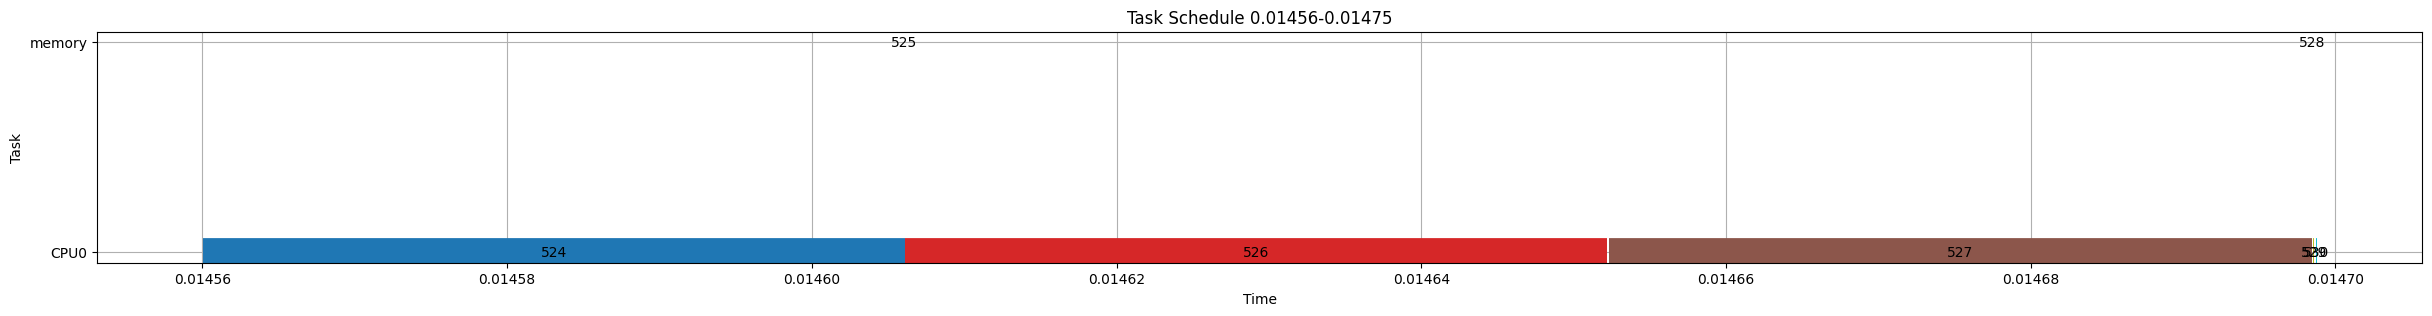

32
0.014745041999999983 - 0.015578846799999975
{'memory', 'CPU0', 'PHU0'}


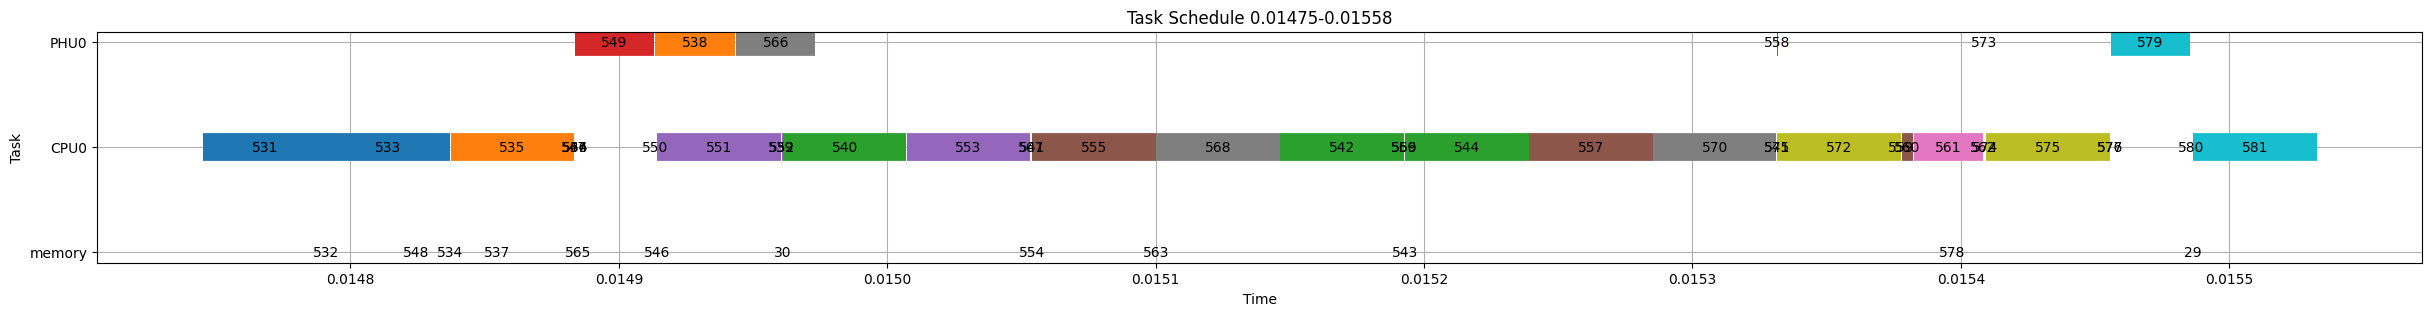

33
0.015578846799999975 - 0.015717346799999976
{'memory', 'CPU0', 'PHU0'}


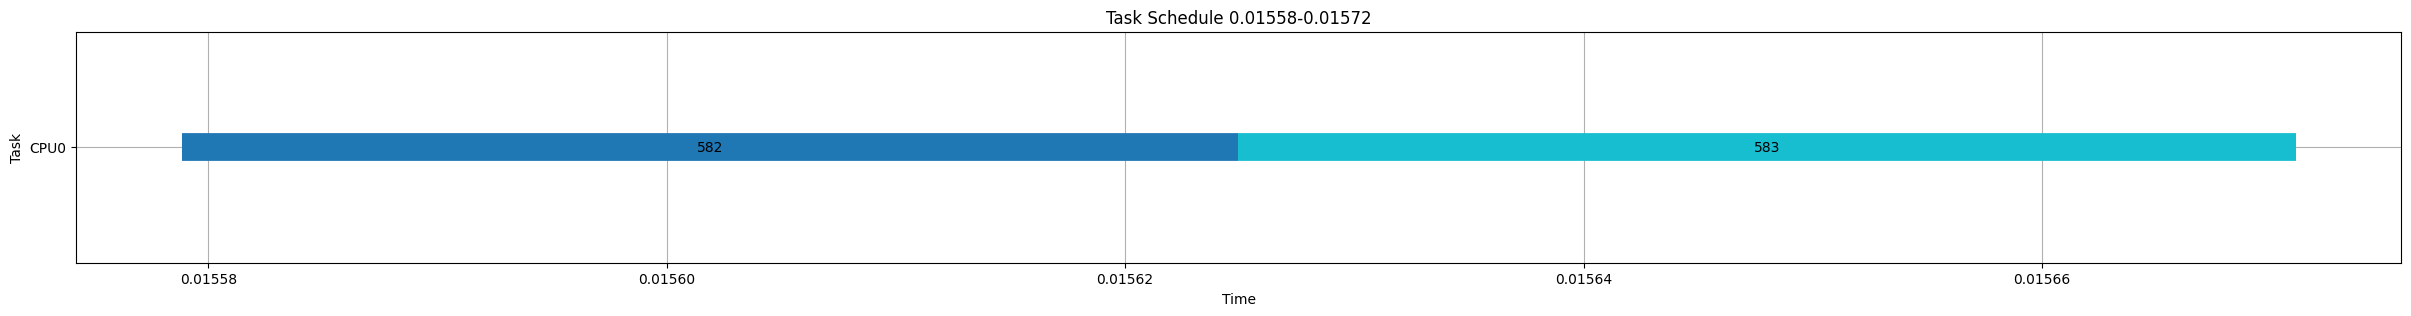

34
0.015717346799999976 - 0.015902346799999974
{'memory', 'CPU0', 'PHU0'}


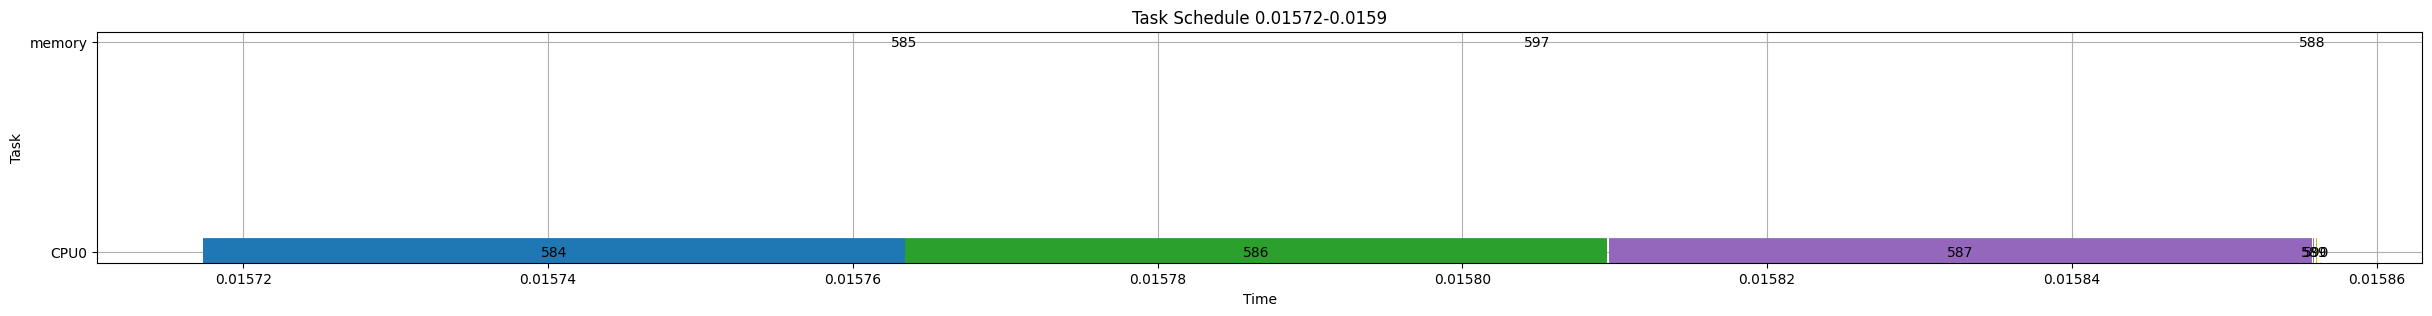

35
0.015902346799999974 - 0.01729653439999998
{'memory', 'CPU0', 'PHU0'}


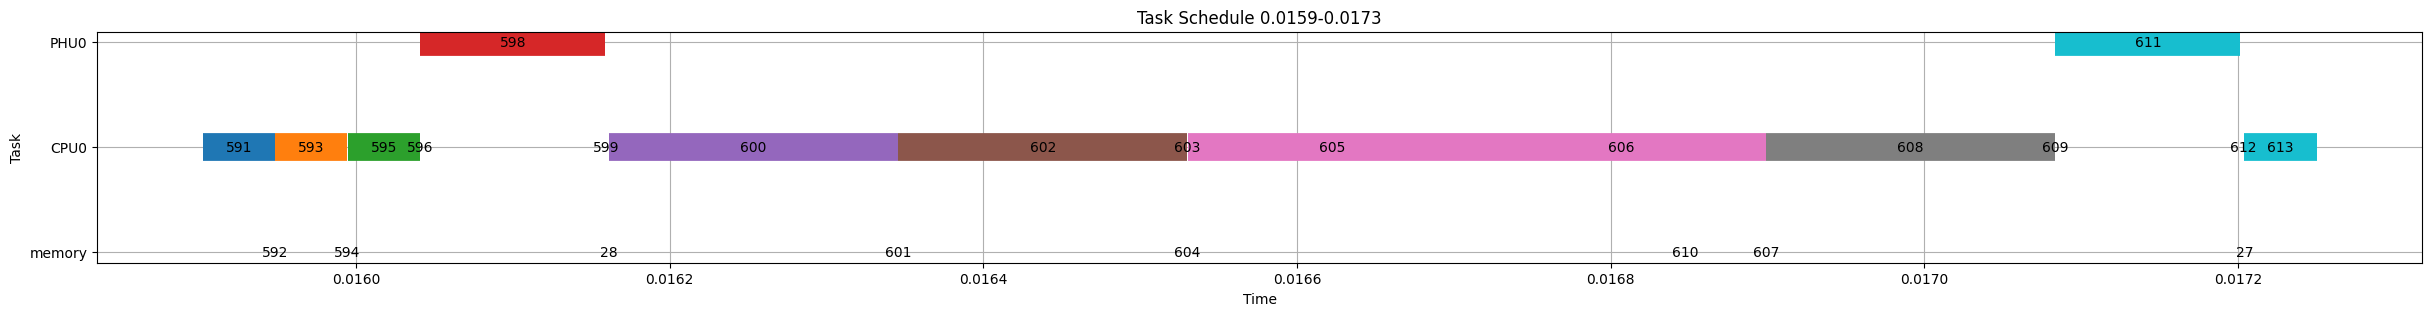

36
0.01729653439999998 - 0.01743503439999998
{'memory', 'CPU0', 'PHU0'}


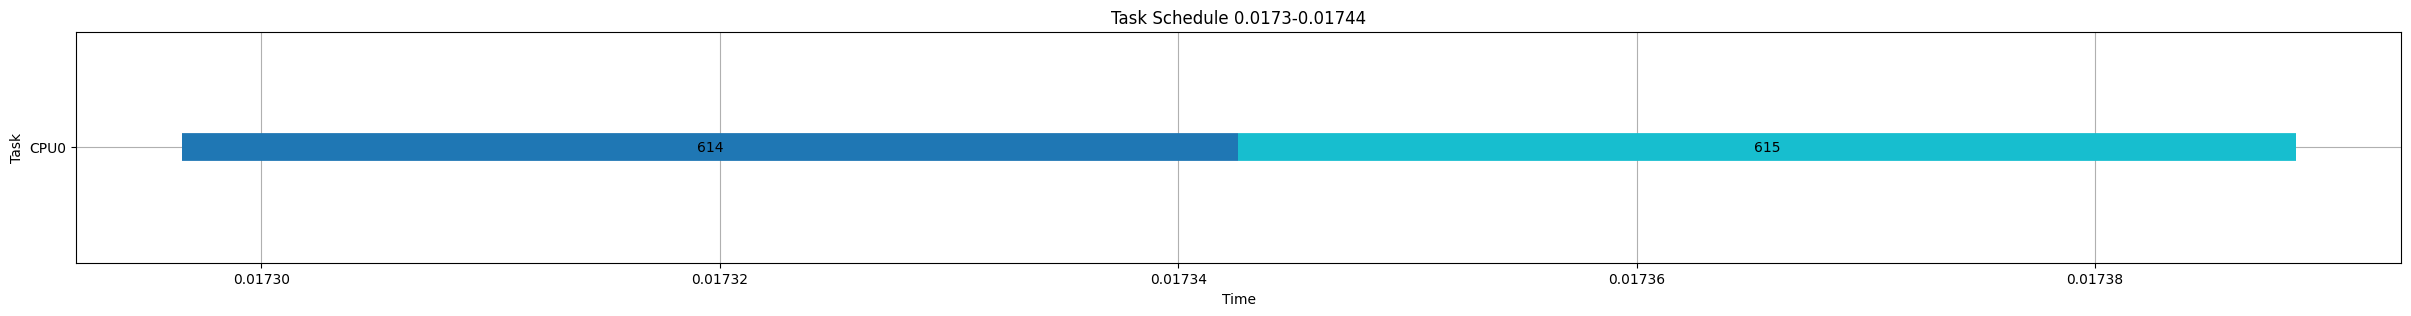

37
0.01743503439999998 - 0.017620034399999977
{'memory', 'CPU0', 'PHU0'}


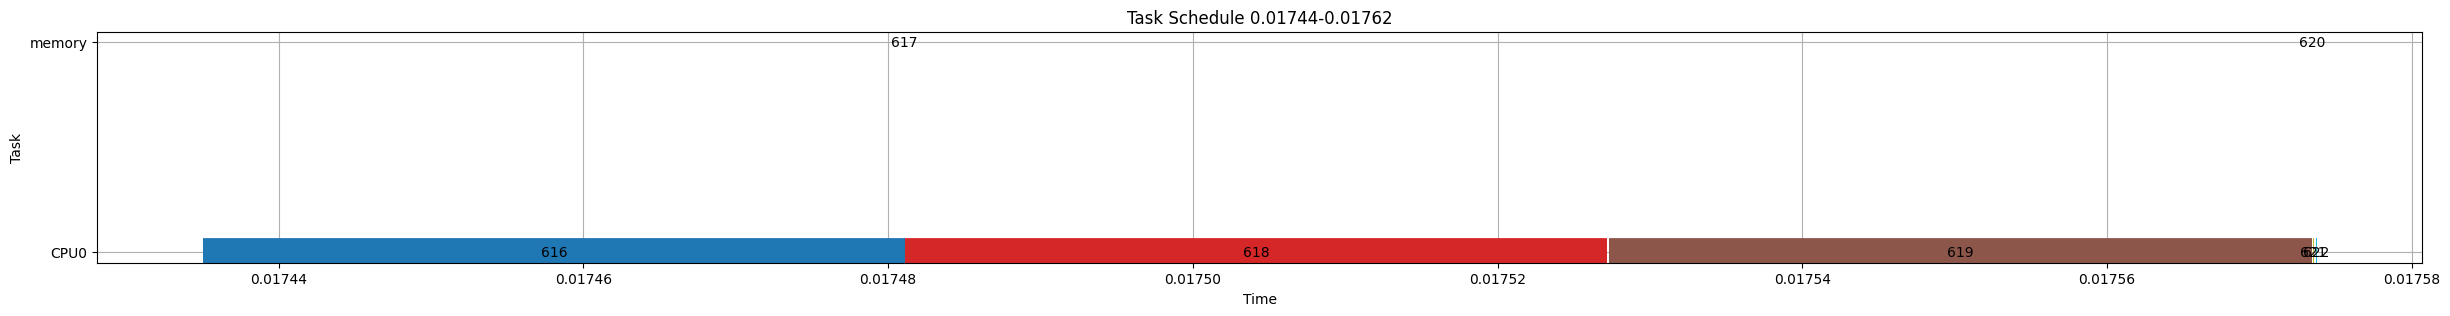

38
0.017620034399999977 - 0.018453839199999978
{'memory', 'CPU0', 'PHU0'}


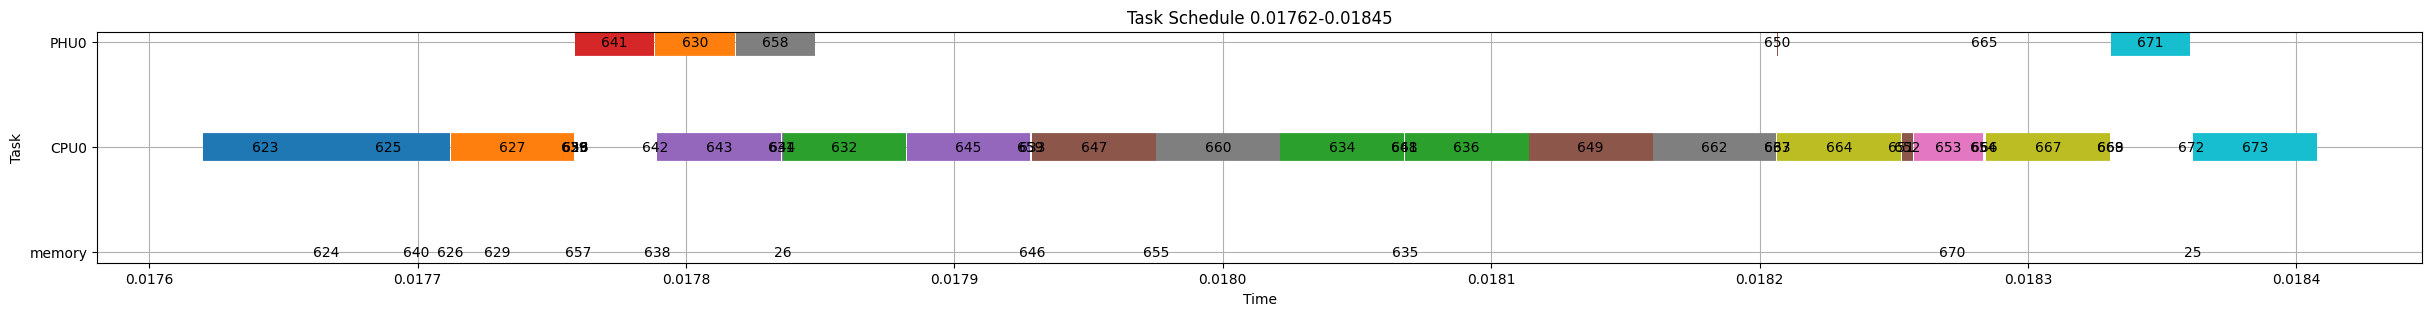

39
0.018453839199999978 - 0.018592339199999978
{'memory', 'CPU0', 'PHU0'}


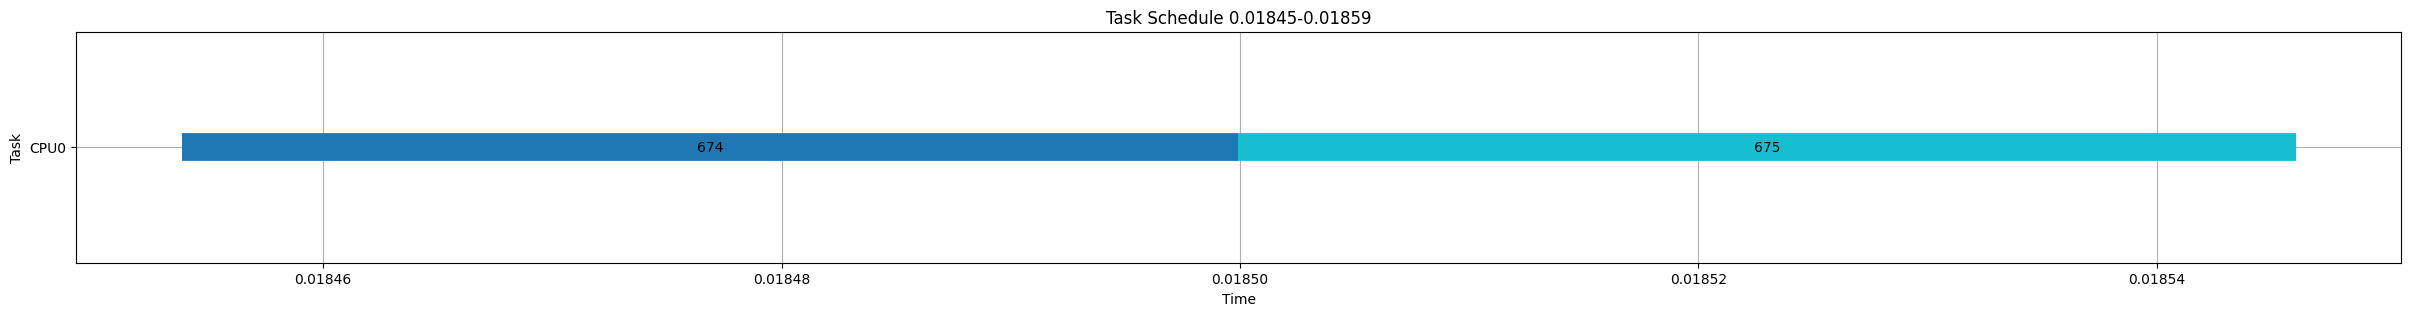

40
0.018592339199999978 - 0.018777339199999975
{'memory', 'CPU0', 'PHU0'}


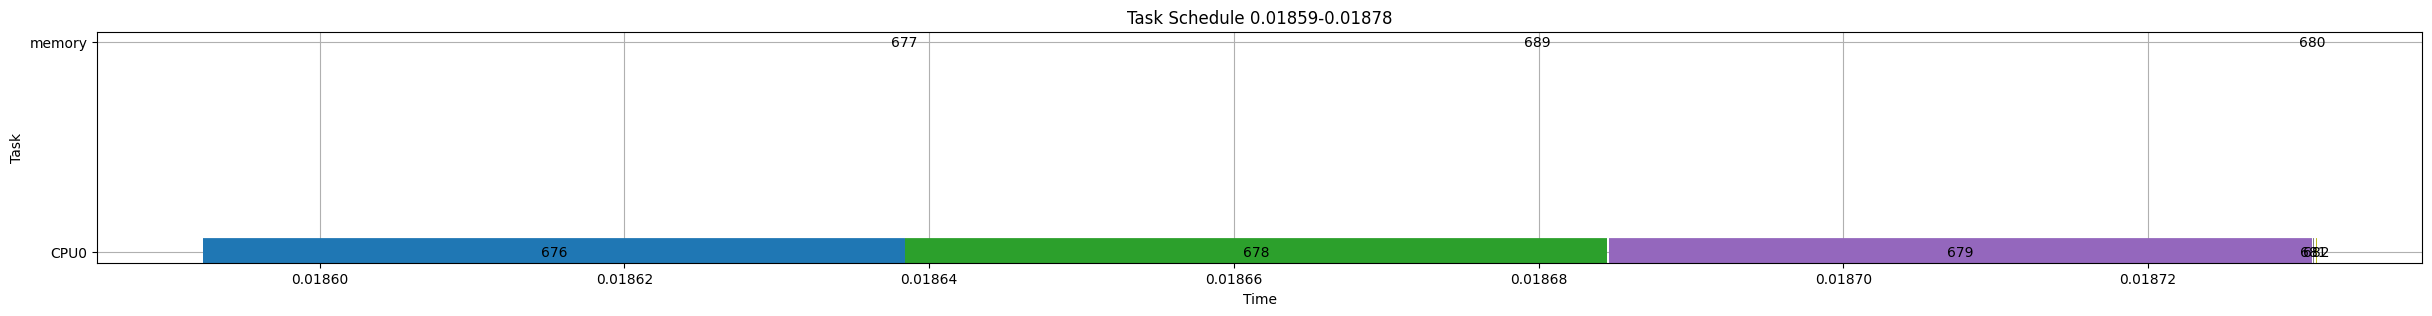

41
0.018777339199999975 - 0.02017152679999998
{'memory', 'CPU0', 'PHU0'}


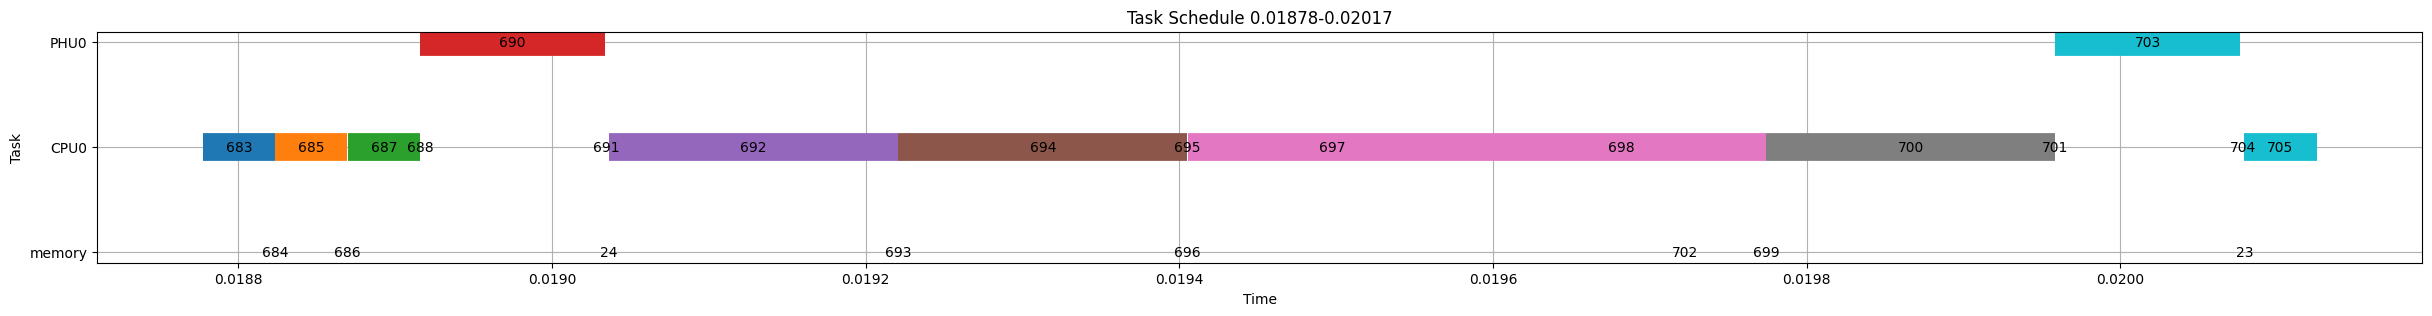

42
0.02017152679999998 - 0.02031002679999998
{'memory', 'CPU0', 'PHU0'}


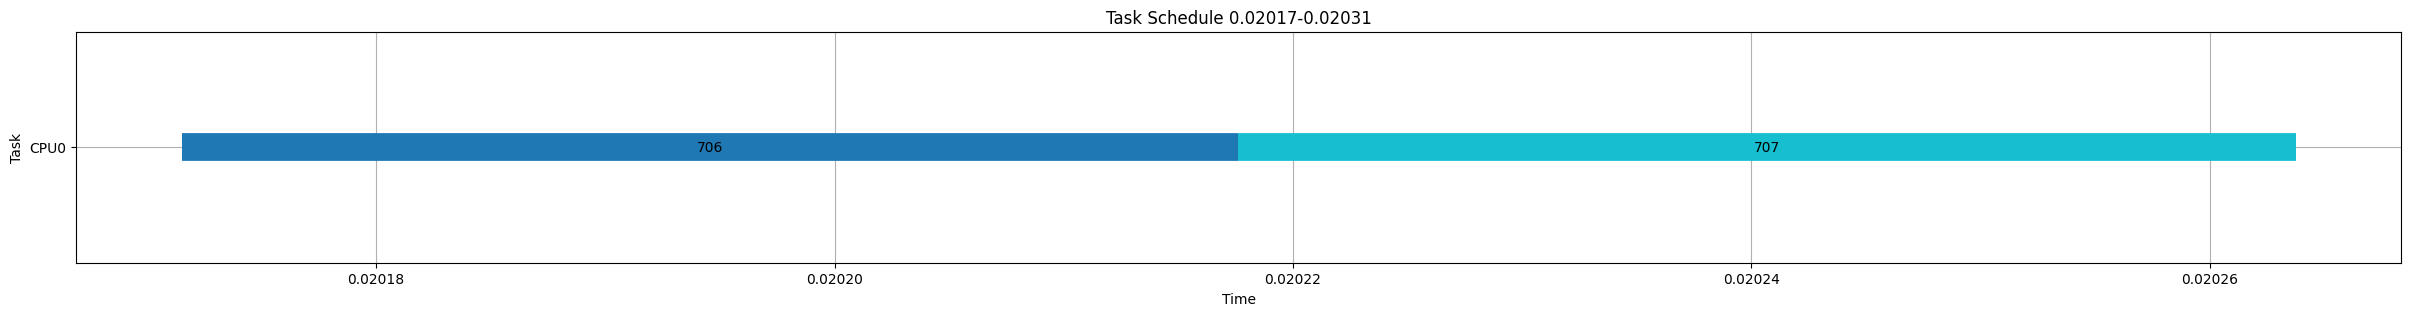

43
0.02031002679999998 - 0.02049502679999998
{'memory', 'CPU0', 'PHU0'}


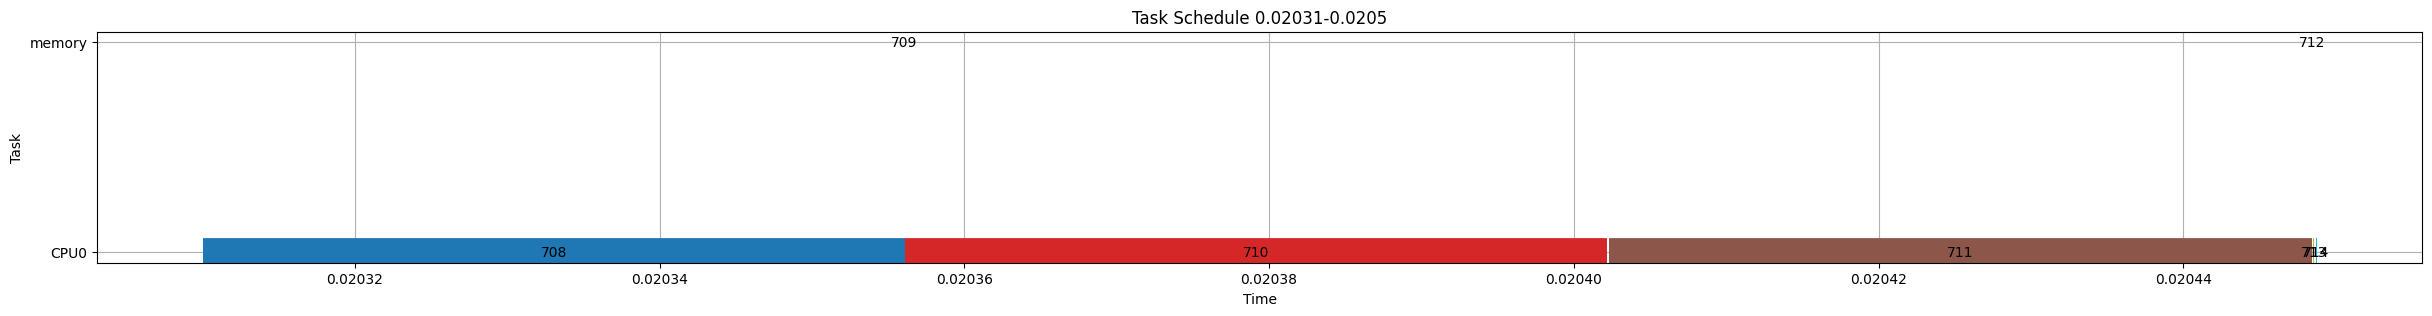

44
0.02049502679999998 - 0.02132883159999998
{'memory', 'CPU0', 'PHU0'}


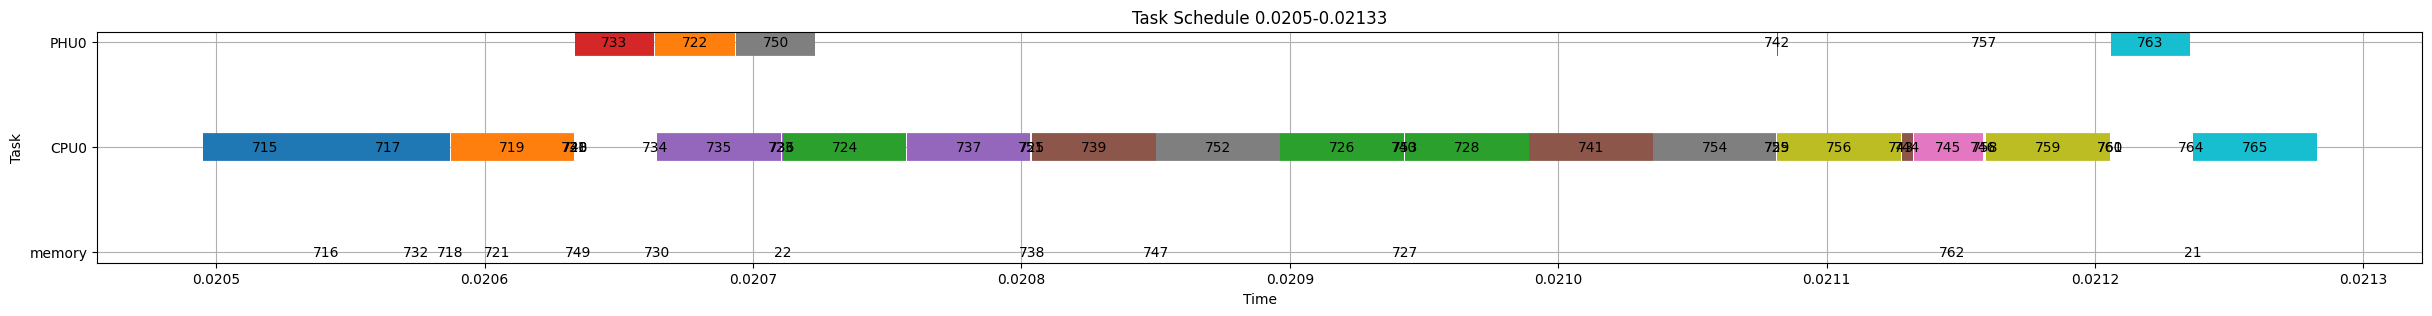

45
0.02132883159999998 - 0.02146733159999998
{'memory', 'CPU0', 'PHU0'}


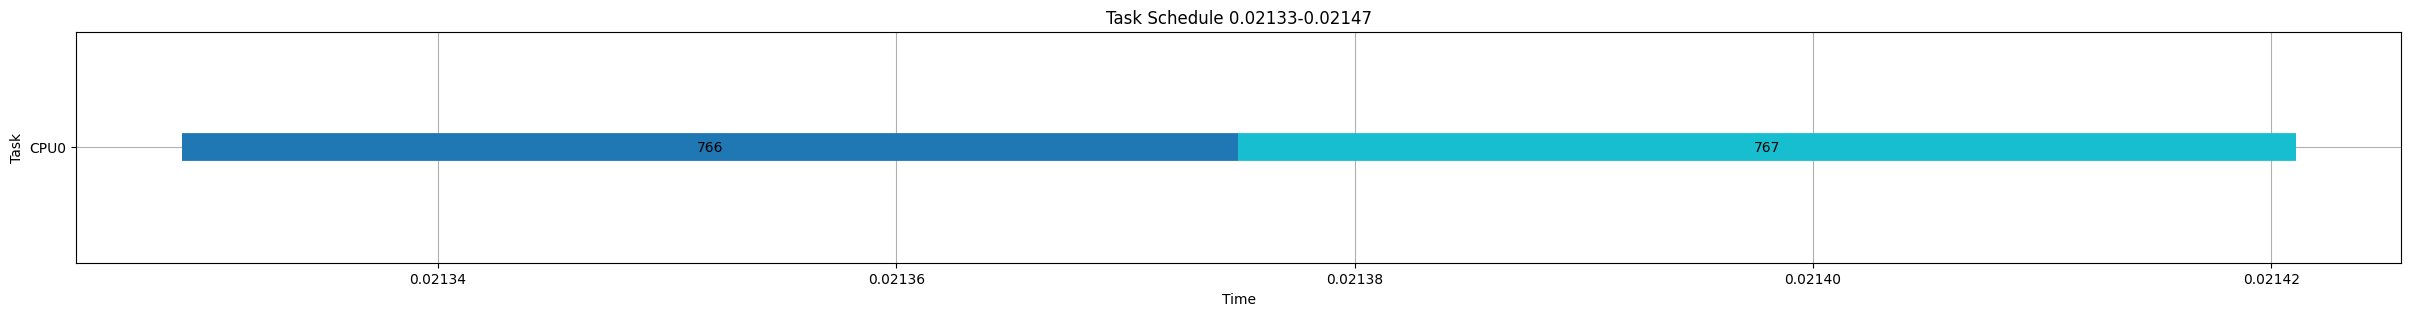

46
0.02146733159999998 - 0.021652331599999977
{'memory', 'CPU0', 'PHU0'}


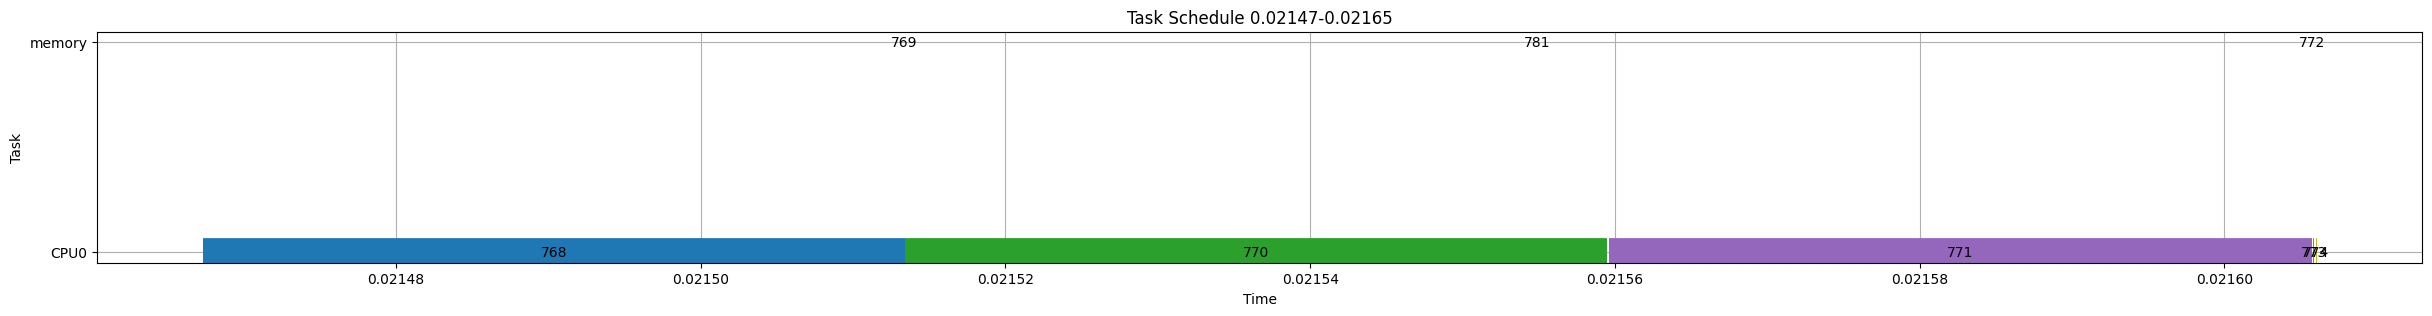

47
0.021652331599999977 - 0.023046519199999983
{'memory', 'CPU0', 'PHU0'}


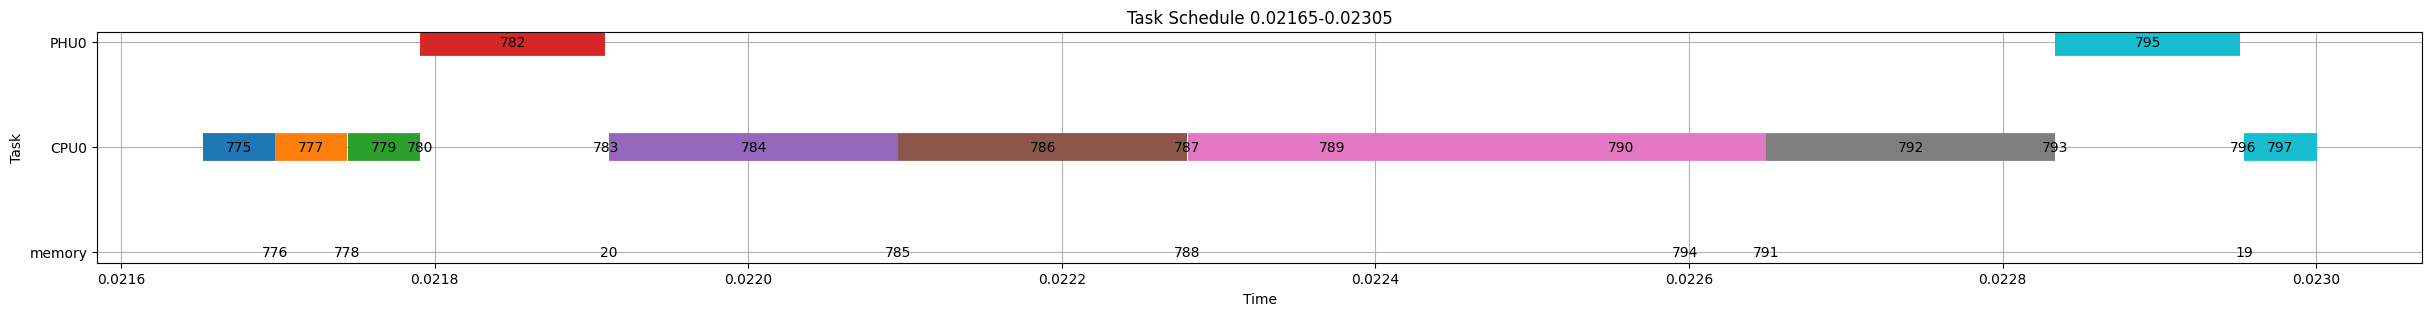

48
0.023046519199999983 - 0.023185019199999983
{'memory', 'CPU0', 'PHU0'}


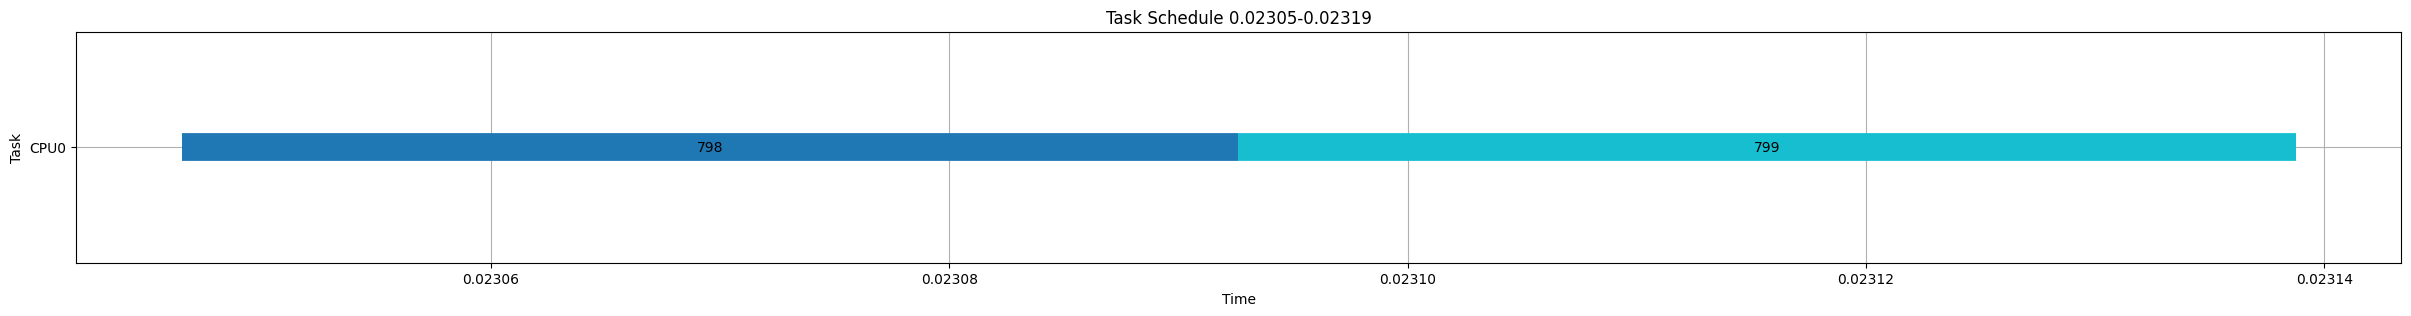

49
0.023185019199999983 - 0.02337001919999998
{'memory', 'CPU0', 'PHU0'}


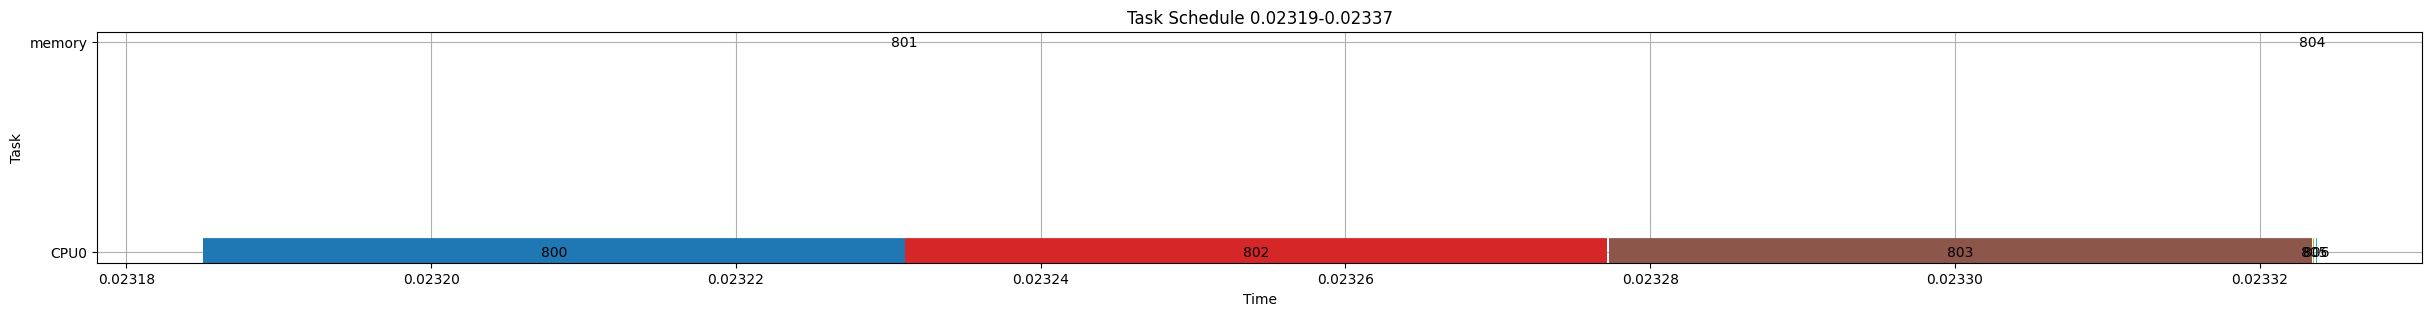

50
0.02337001919999998 - 0.02420382399999998
{'memory', 'CPU0', 'PHU0'}


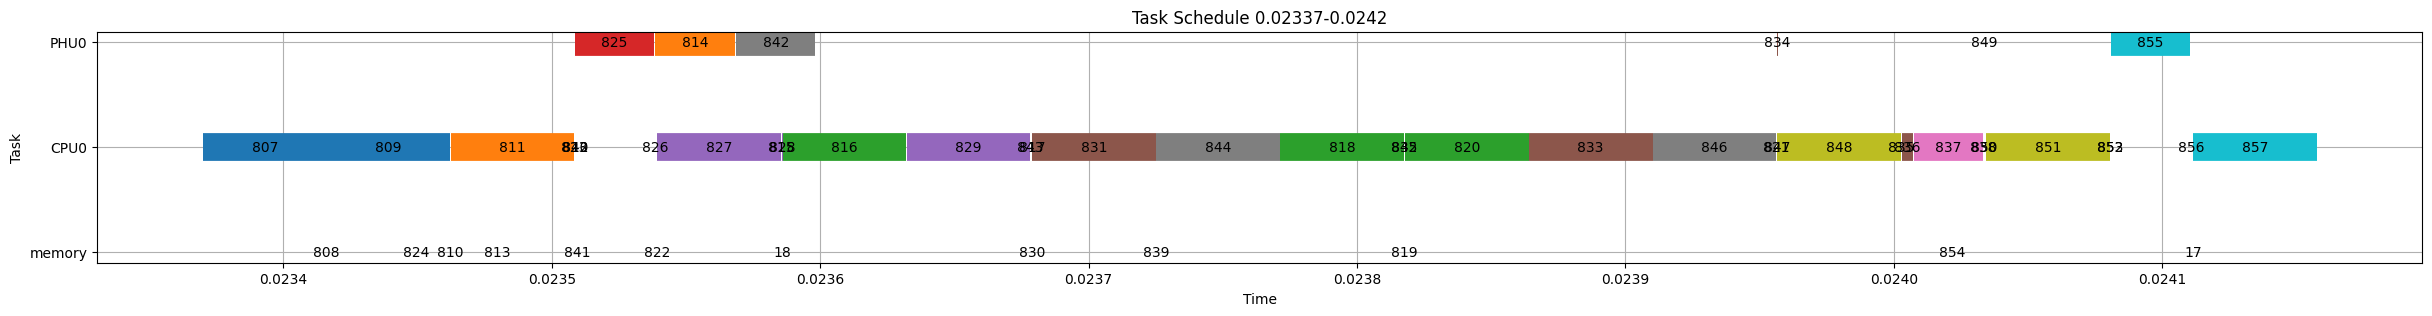

51
0.02420382399999998 - 0.02434232399999998
{'memory', 'CPU0', 'PHU0'}


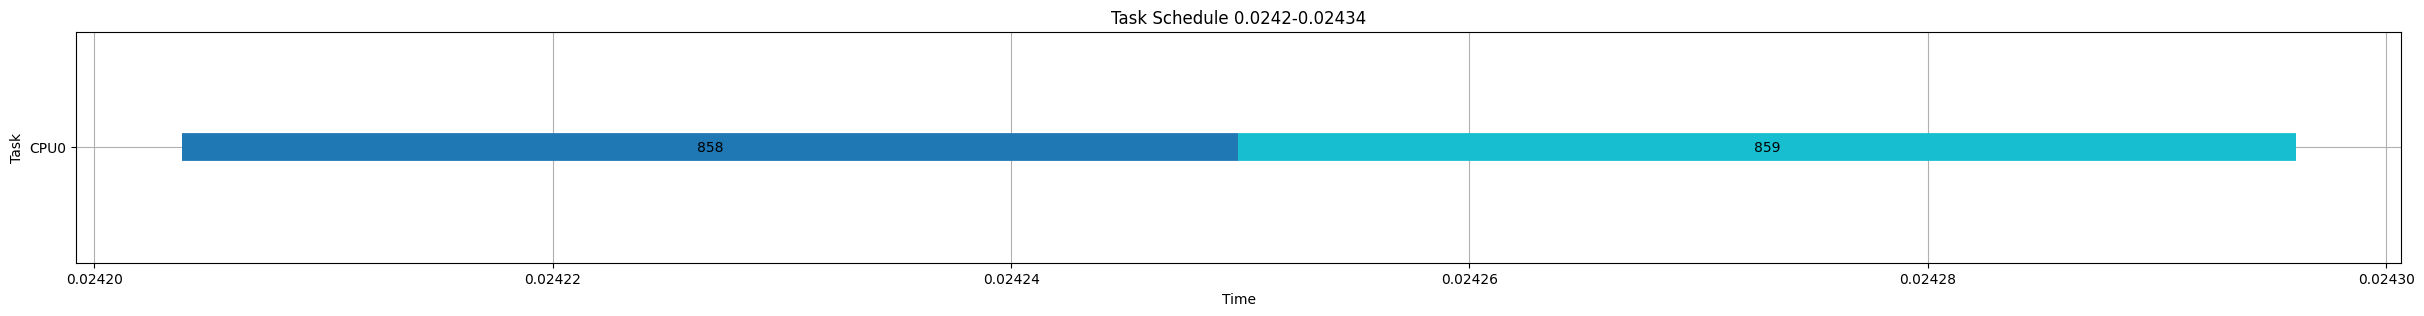

52
0.02434232399999998 - 0.02452732399999998
{'memory', 'CPU0', 'PHU0'}


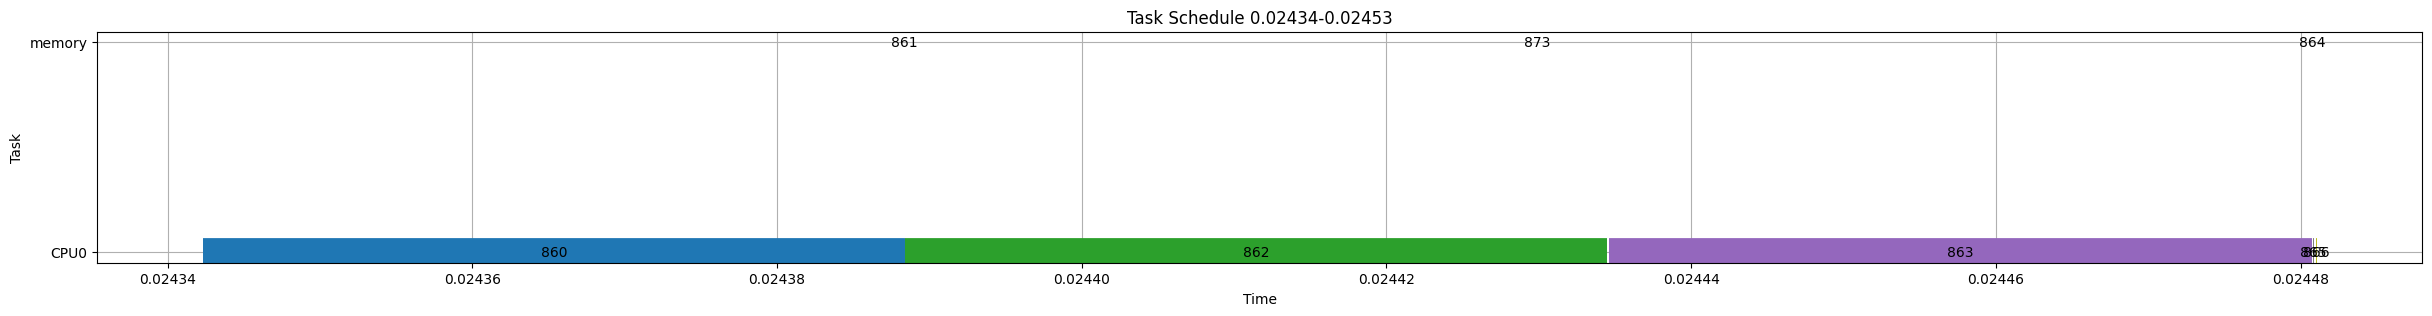

53
0.02452732399999998 - 0.025921511599999985
{'memory', 'CPU0', 'PHU0'}


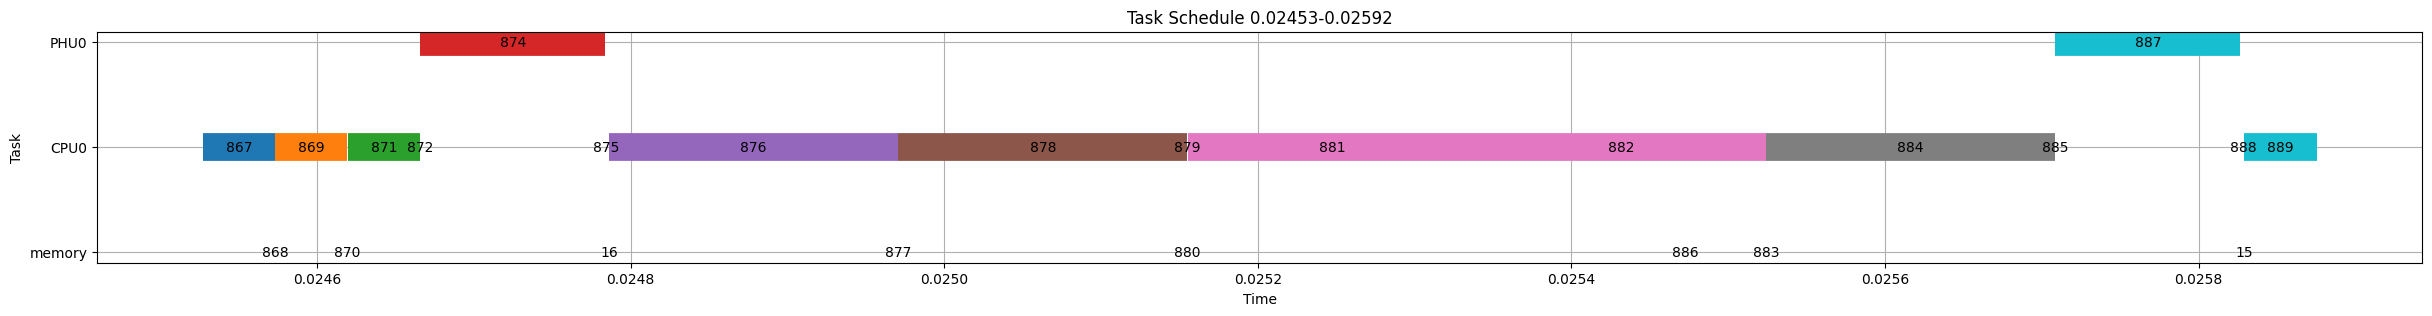

54
0.025921511599999985 - 0.026060011599999985
{'memory', 'CPU0', 'PHU0'}


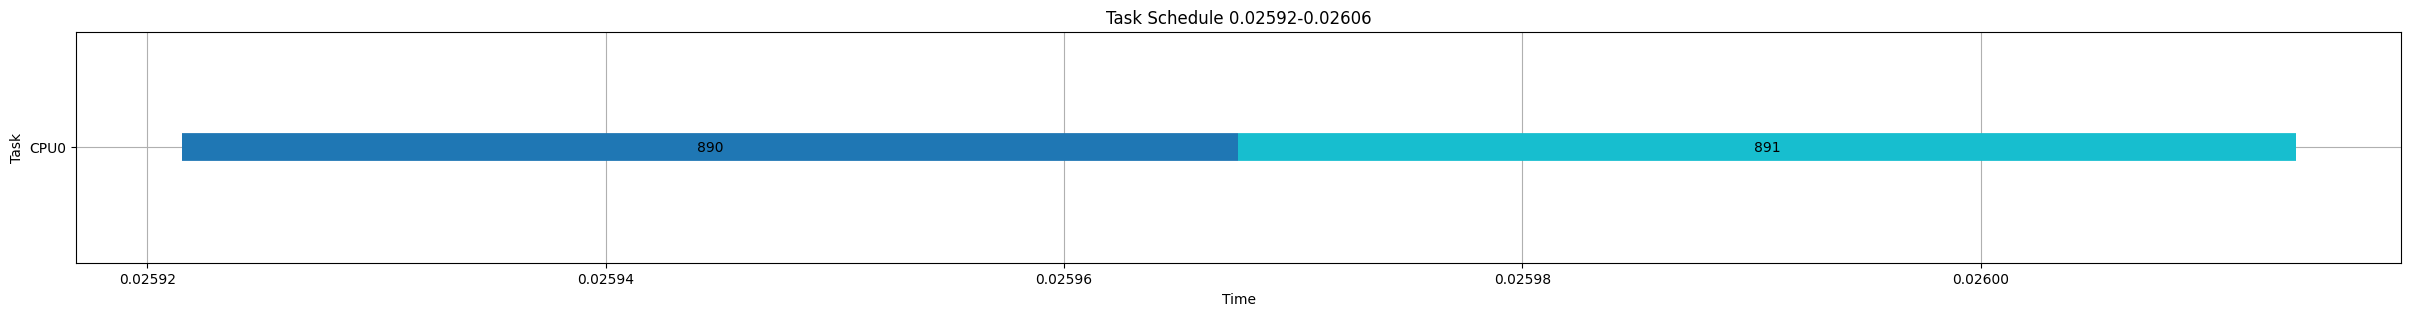

55
0.026060011599999985 - 0.026245011599999982
{'memory', 'CPU0', 'PHU0'}


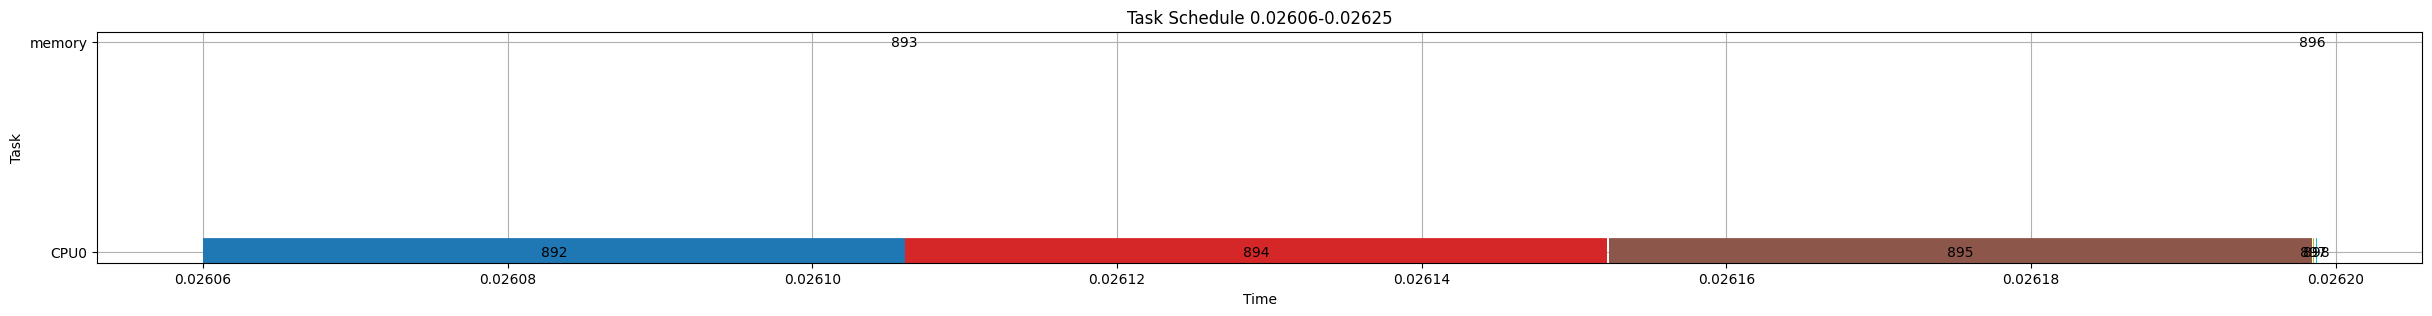

56
0.026245011599999982 - 0.027078816399999983
{'memory', 'CPU0', 'PHU0'}


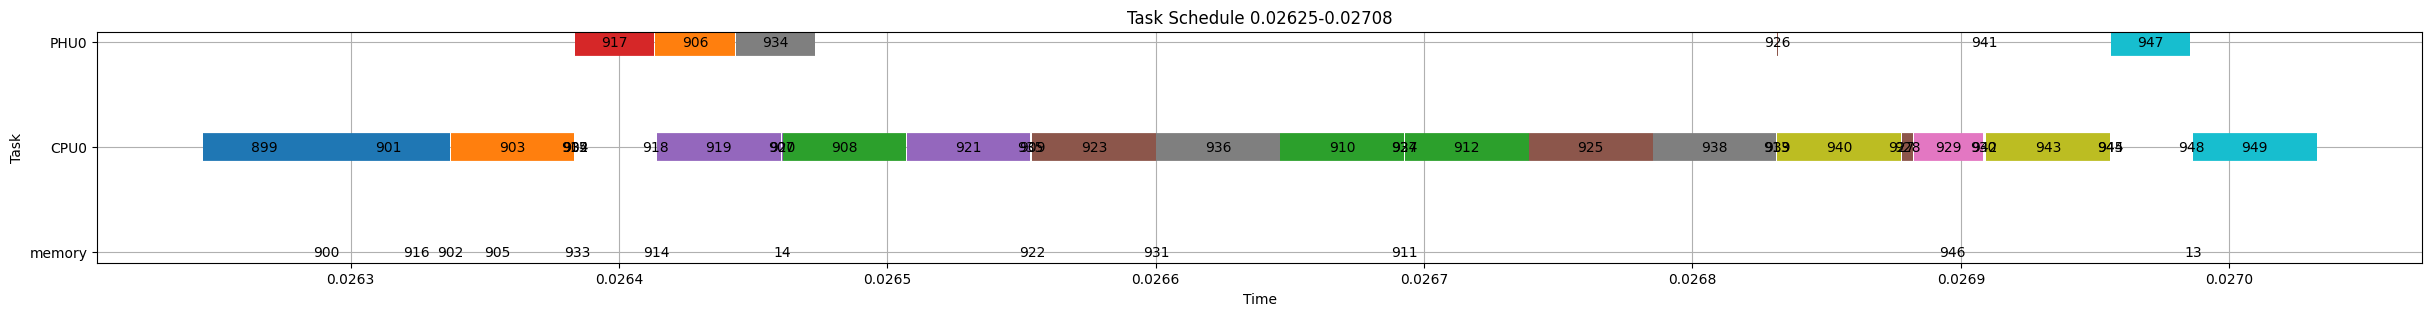

57
0.027078816399999983 - 0.027217316399999983
{'memory', 'CPU0', 'PHU0'}


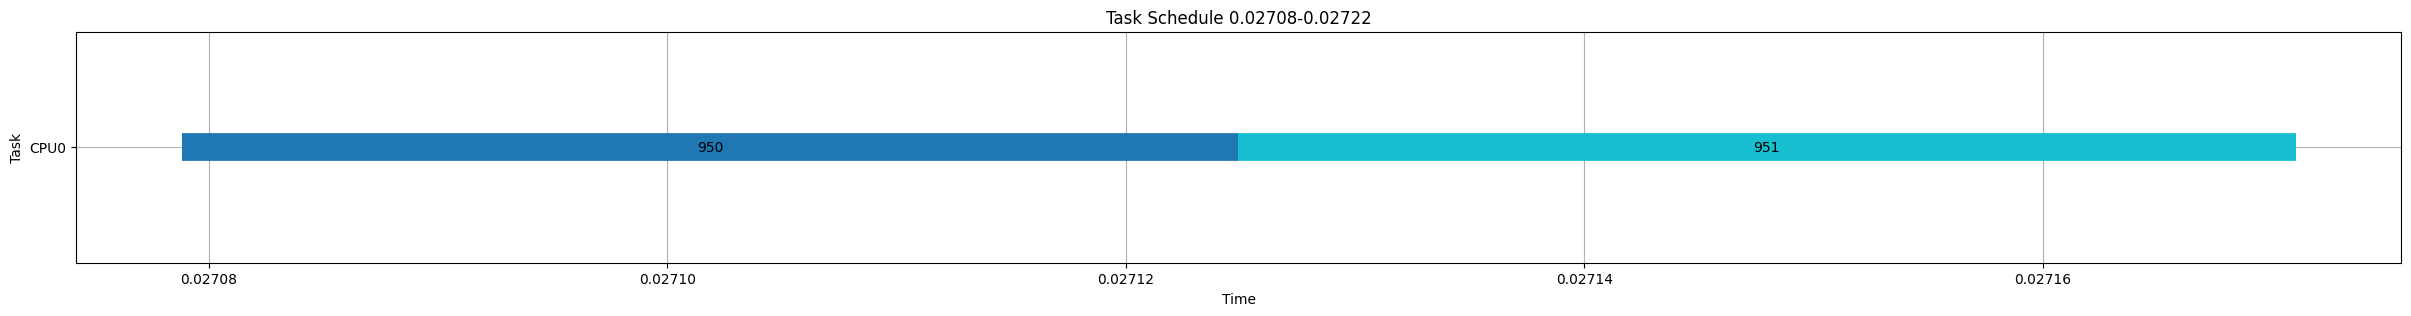

58
0.027217316399999983 - 0.02740231639999998
{'memory', 'CPU0', 'PHU0'}


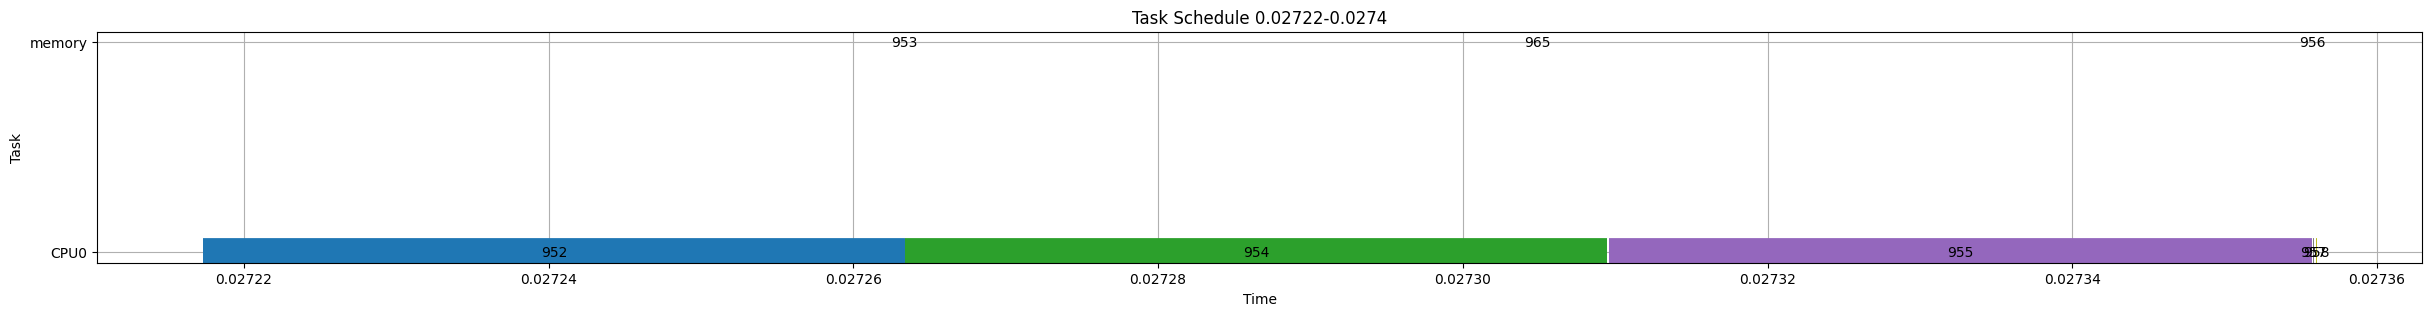

59
0.02740231639999998 - 0.028796503999999987
{'memory', 'CPU0', 'PHU0'}


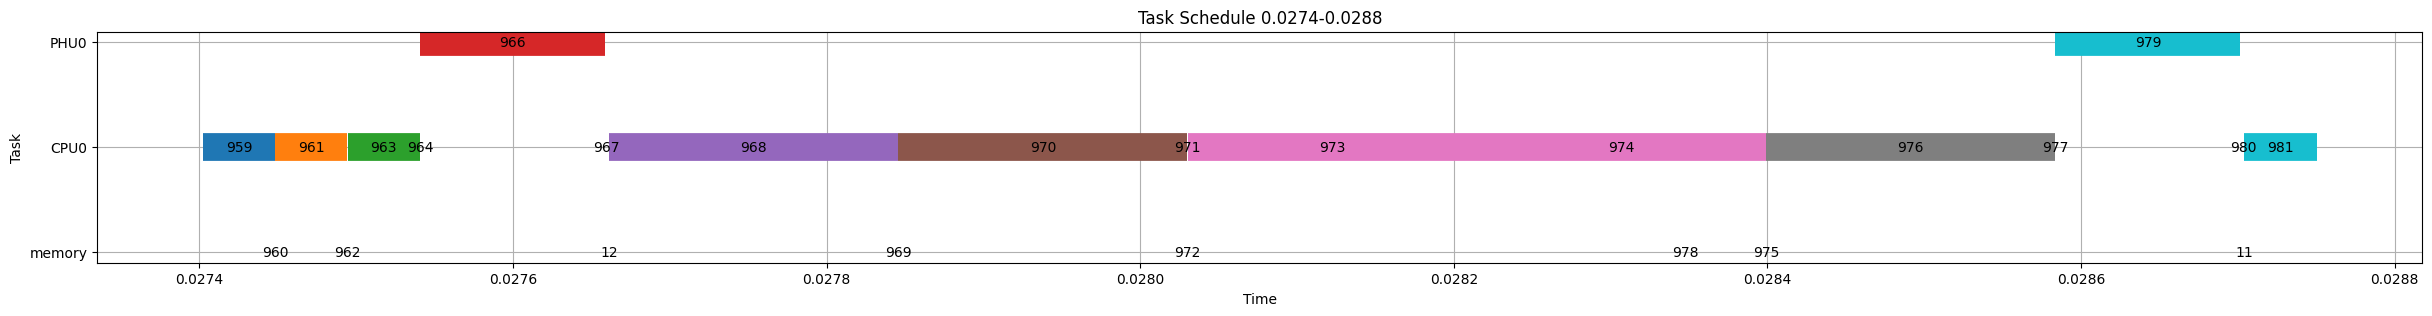

60
0.028796503999999987 - 0.028935003999999986
{'memory', 'CPU0', 'PHU0'}


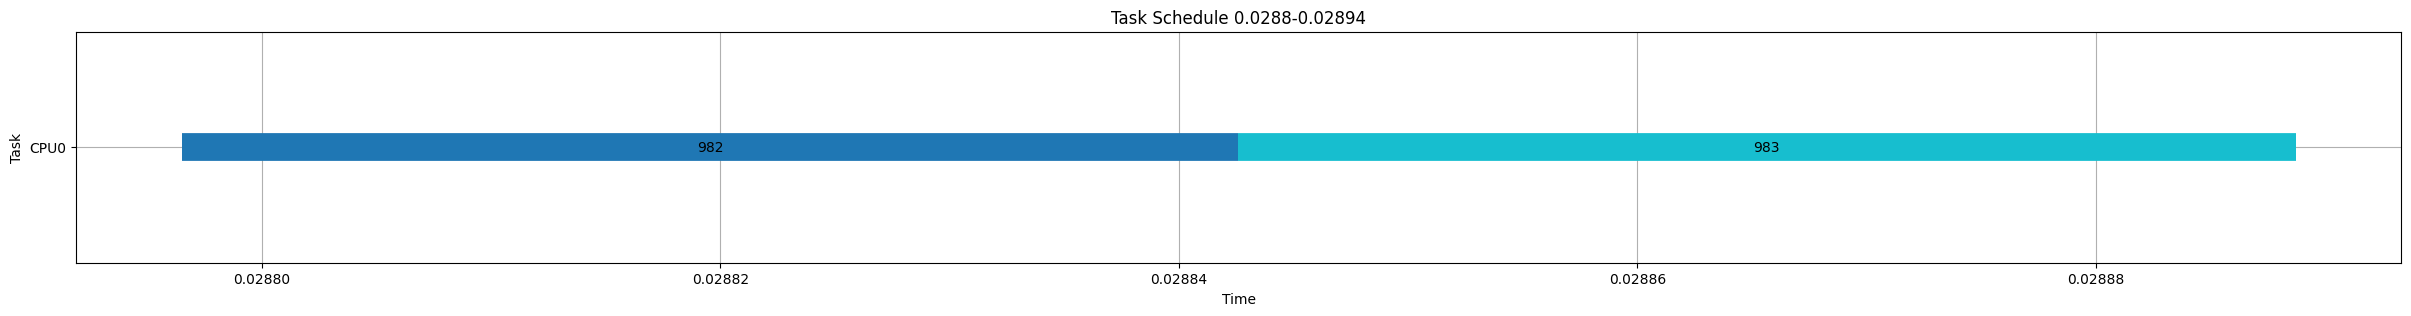

61
0.028935003999999986 - 0.029120003999999984
{'memory', 'CPU0', 'PHU0'}


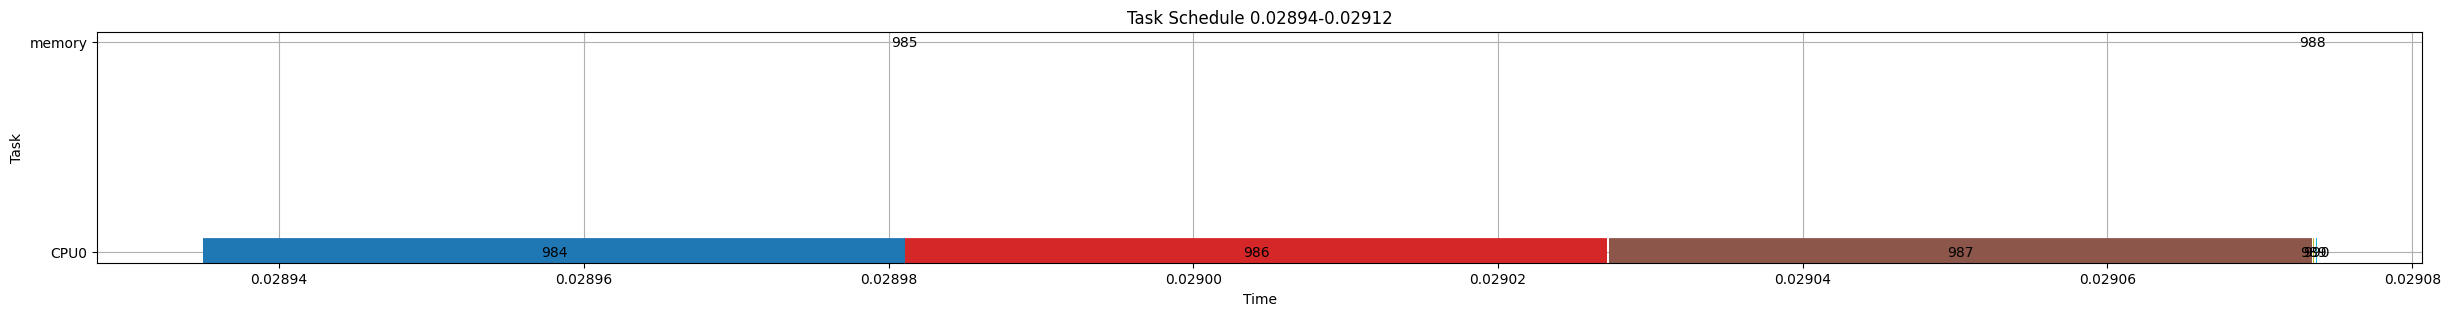

62
0.029120003999999984 - 0.029953808799999985
{'memory', 'CPU0', 'PHU0'}


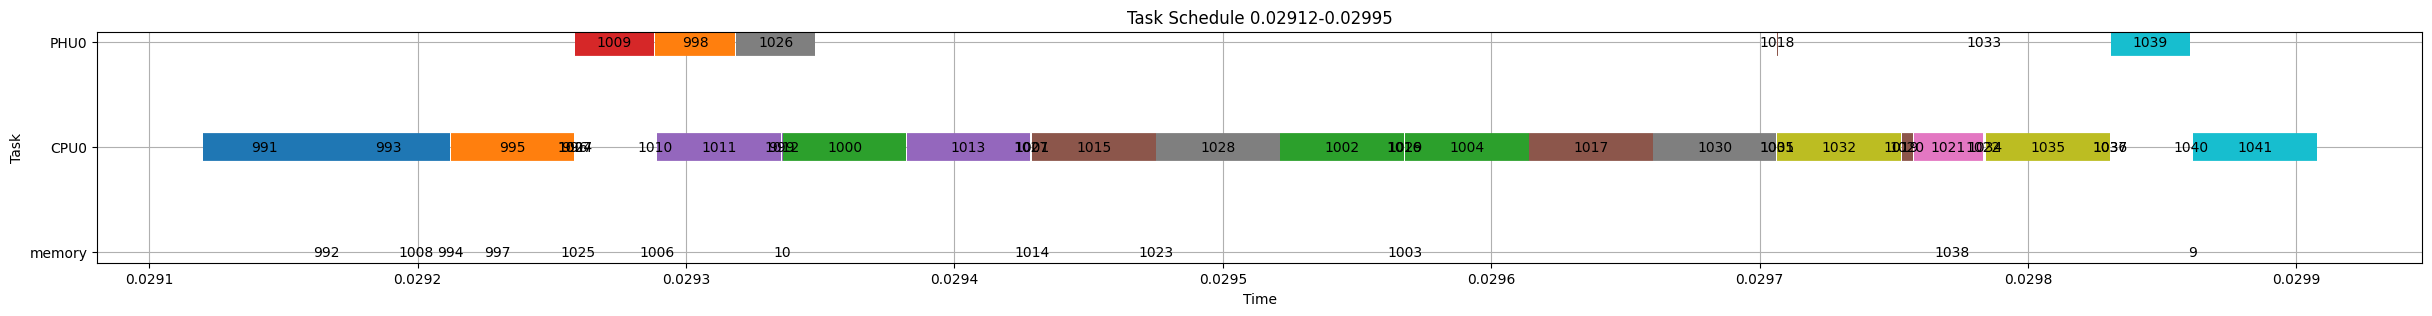

63
0.029953808799999985 - 0.030092308799999985
{'memory', 'CPU0', 'PHU0'}


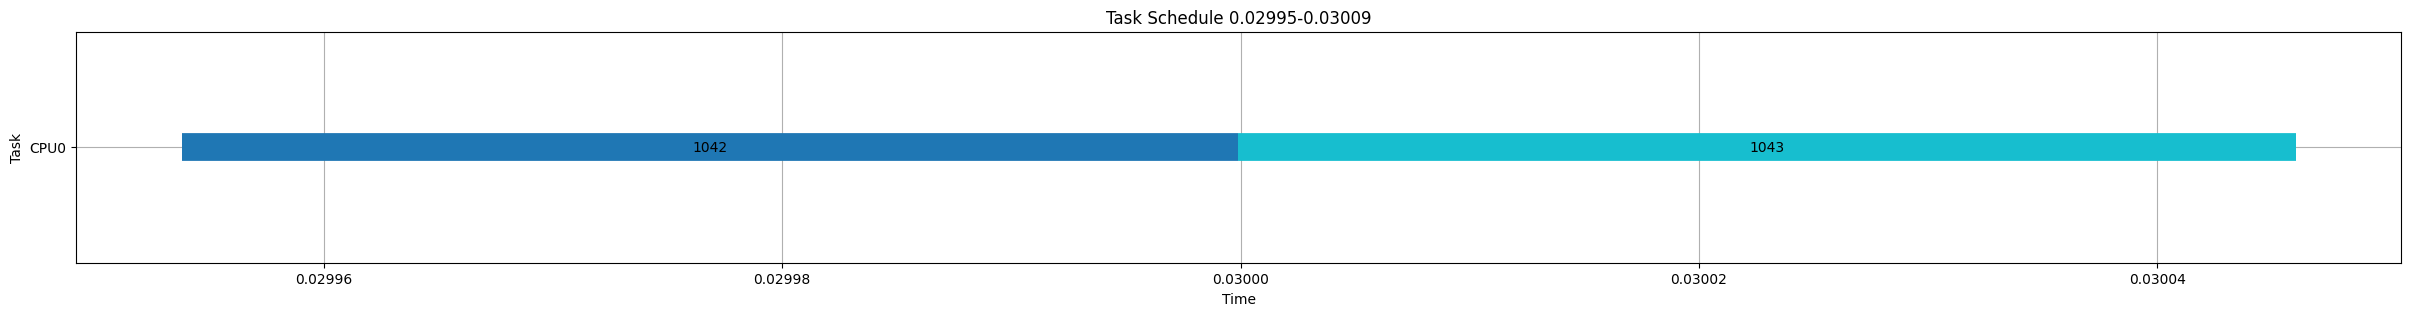

64
0.030092308799999985 - 0.030277308799999982
{'memory', 'CPU0', 'PHU0'}


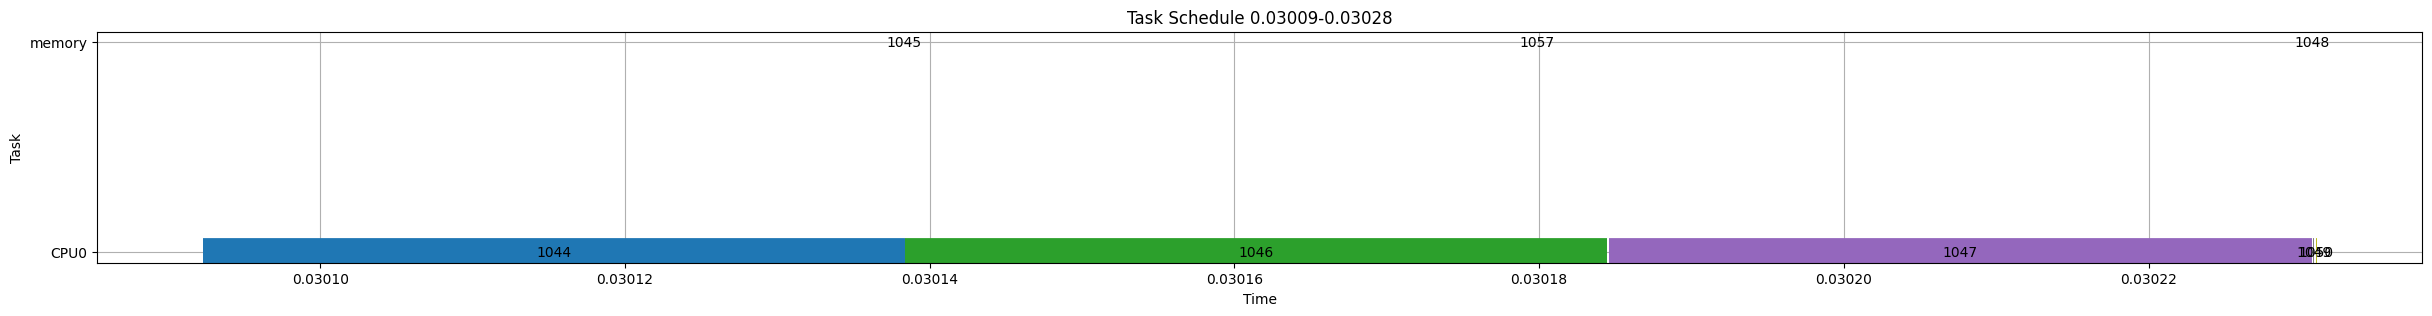

65
0.030277308799999982 - 0.031671496399999985
{'memory', 'CPU0', 'PHU0'}


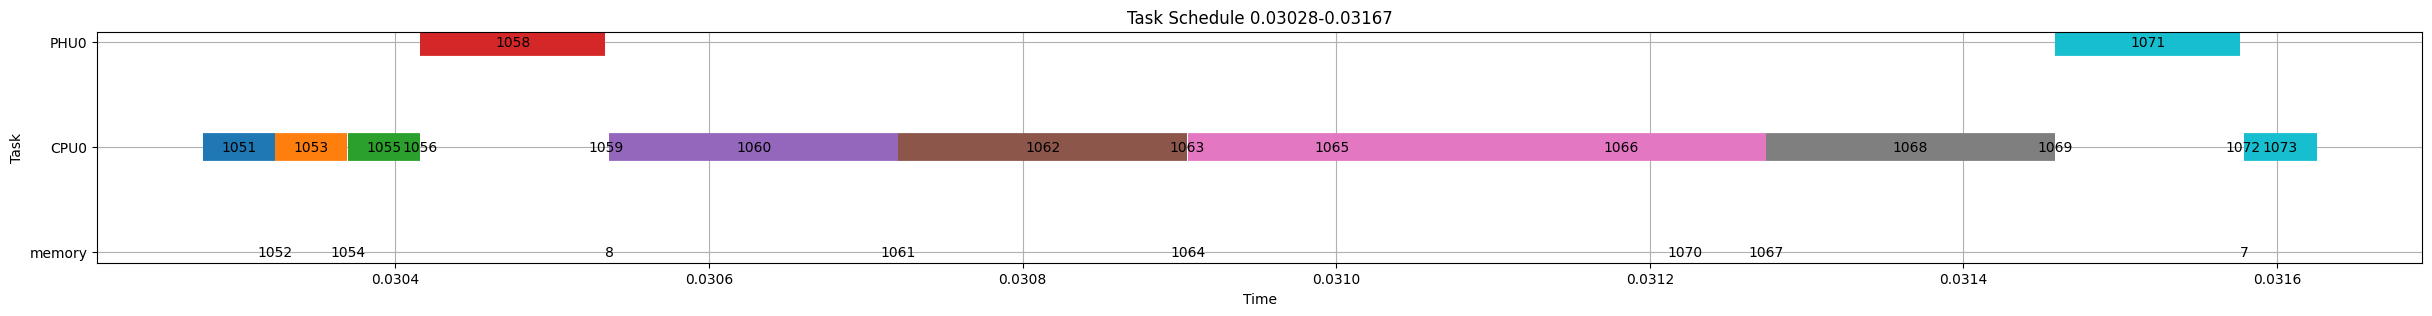

66
0.031671496399999985 - 0.031809996399999985
{'memory', 'CPU0', 'PHU0'}


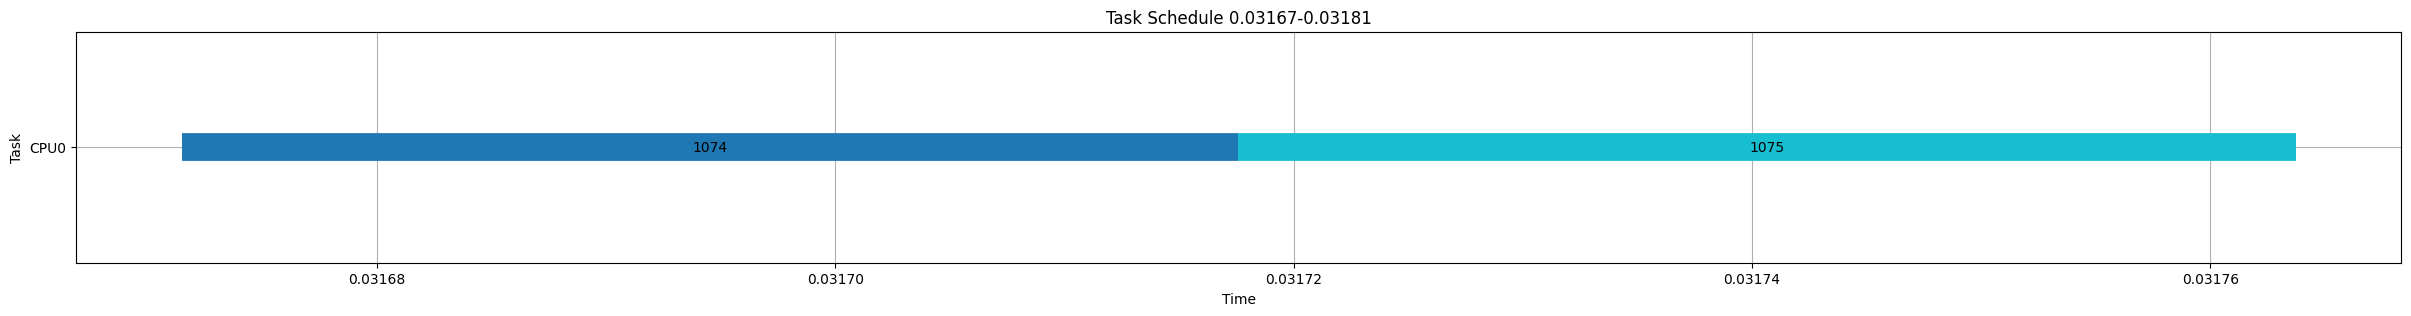

67
0.031809996399999985 - 0.03199499639999998
{'memory', 'CPU0', 'PHU0'}


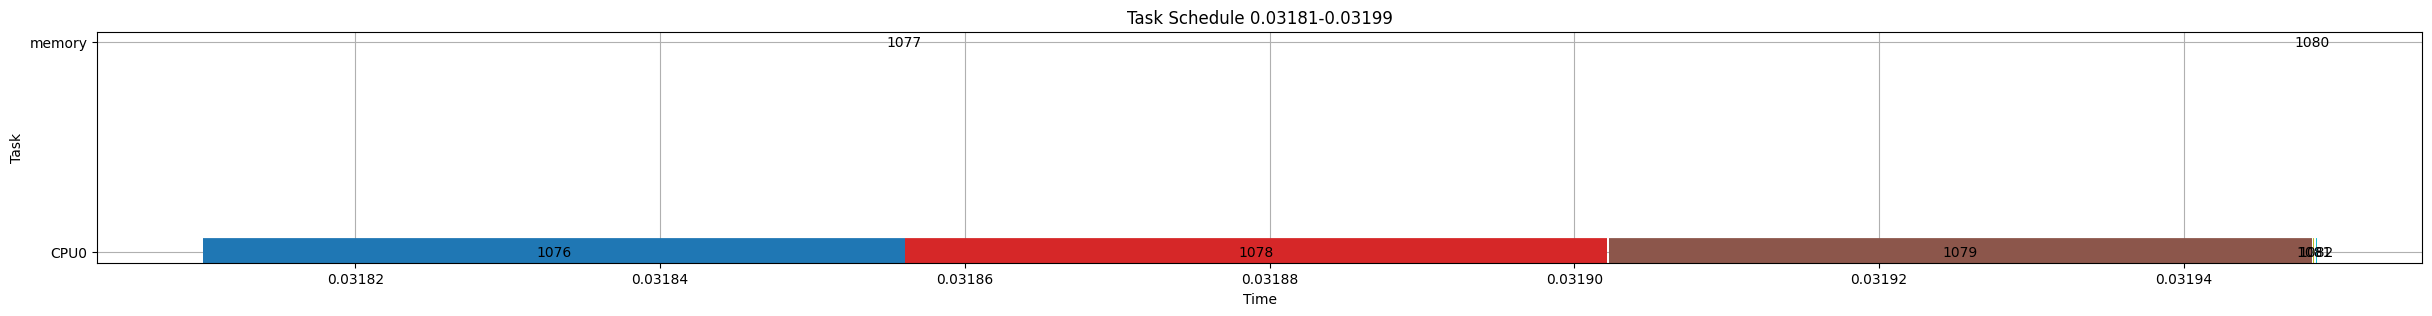

68
0.03199499639999998 - 0.032828801199999966
{'memory', 'CPU0', 'PHU0'}


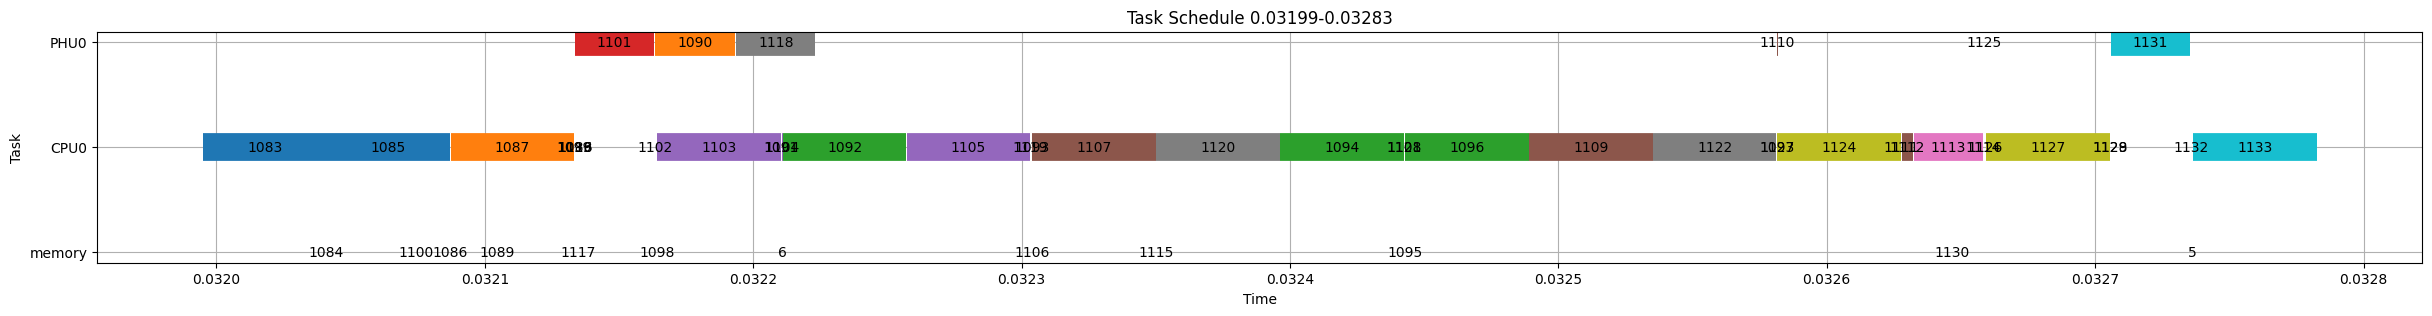

69
0.032828801199999966 - 0.032967301199999965
{'memory', 'CPU0', 'PHU0'}


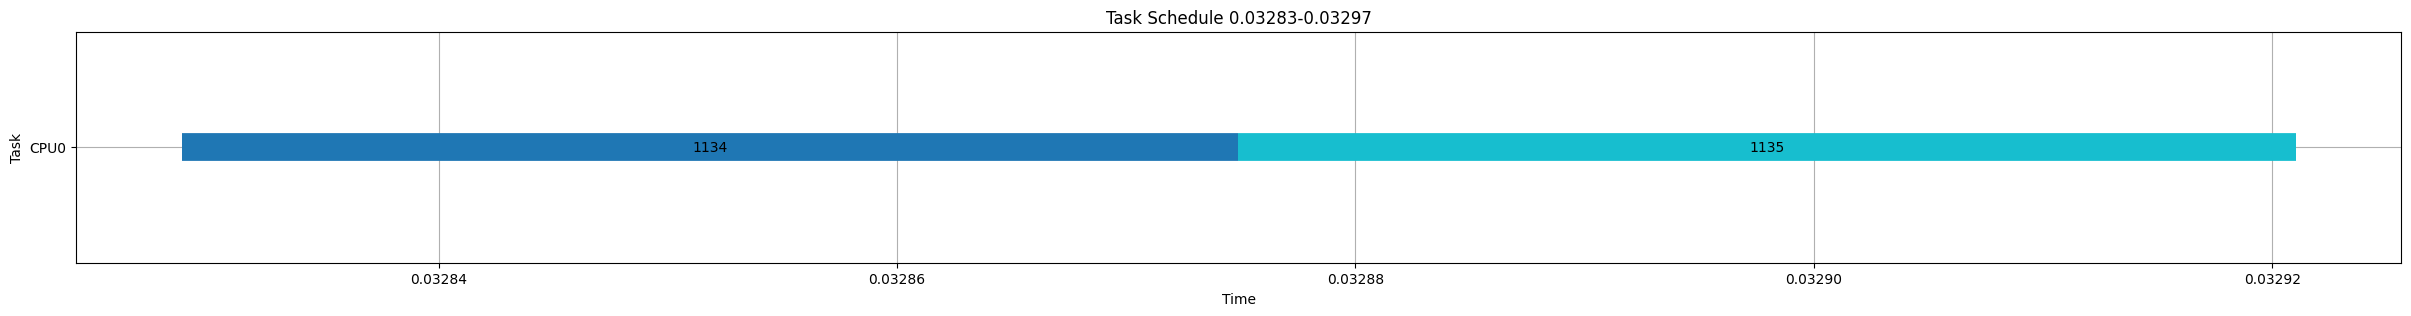

70
0.032967301199999965 - 0.03315230119999996
{'memory', 'CPU0', 'PHU0'}


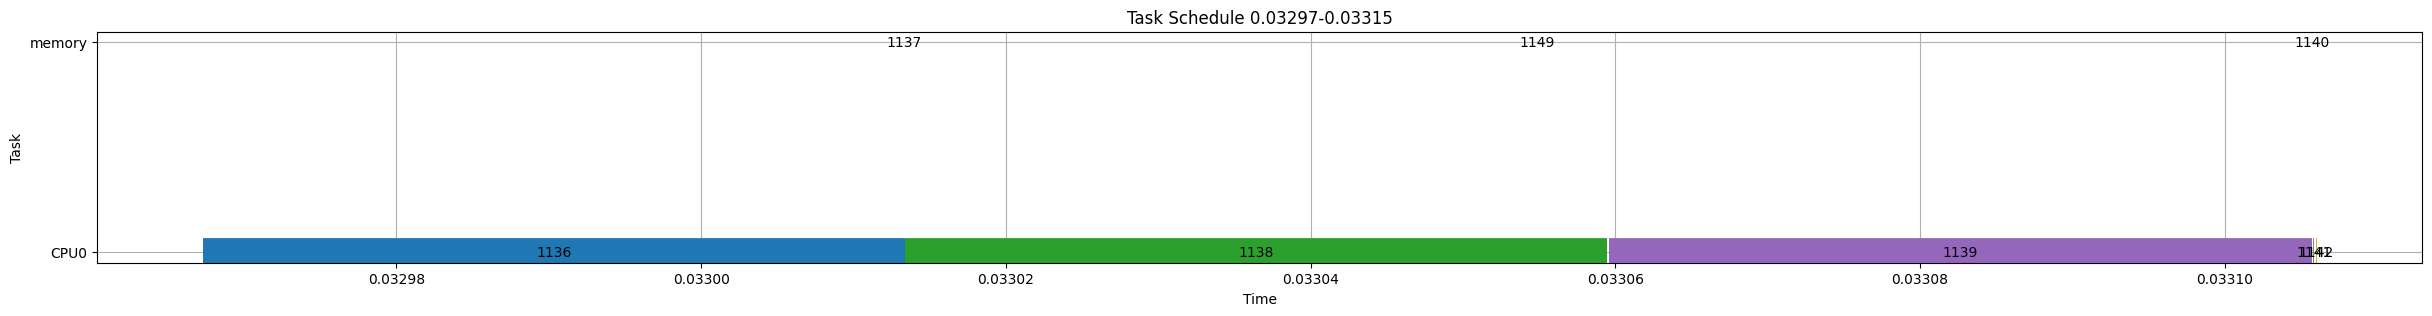

71
0.03315230119999996 - 0.03454648879999995
{'memory', 'CPU0', 'PHU0'}


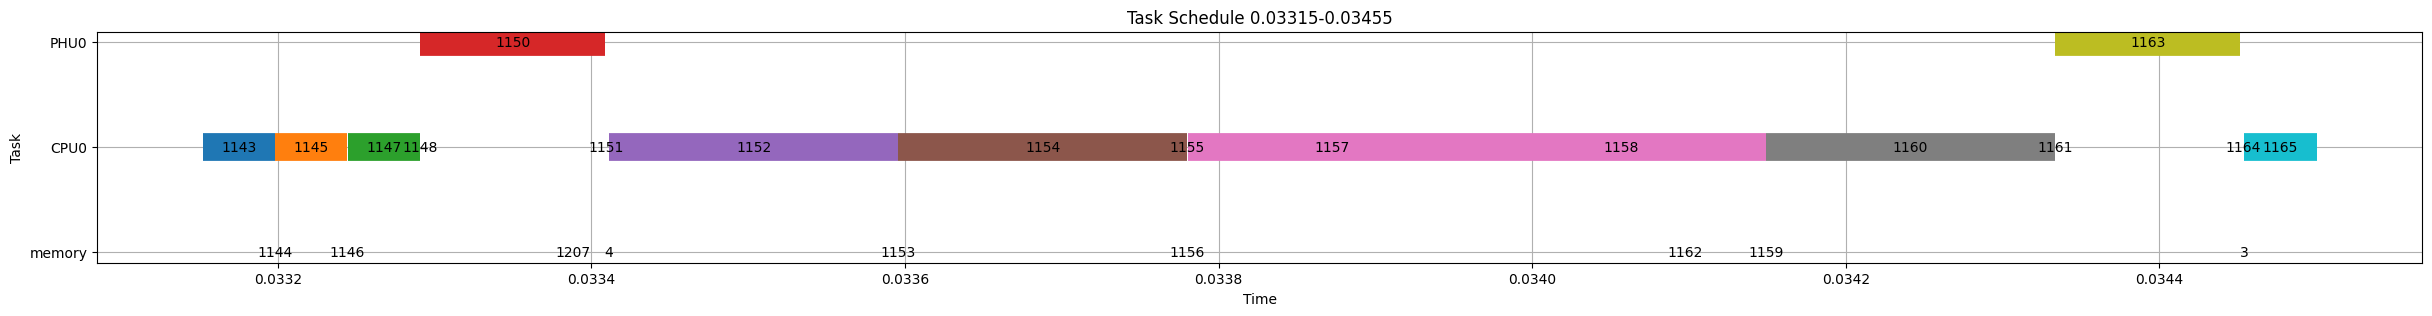

72
0.03454648879999995 - 0.03468498879999995
{'memory', 'CPU0', 'PHU0'}


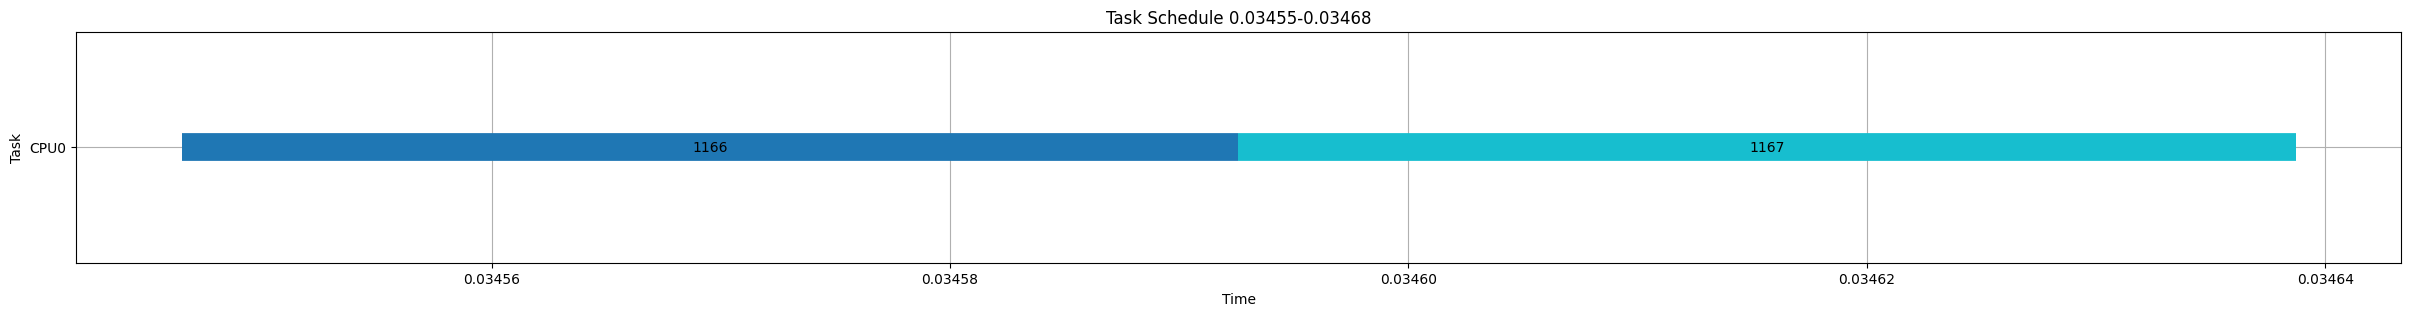

73
0.03468498879999995 - 0.034869988799999946
{'memory', 'CPU0', 'PHU0'}


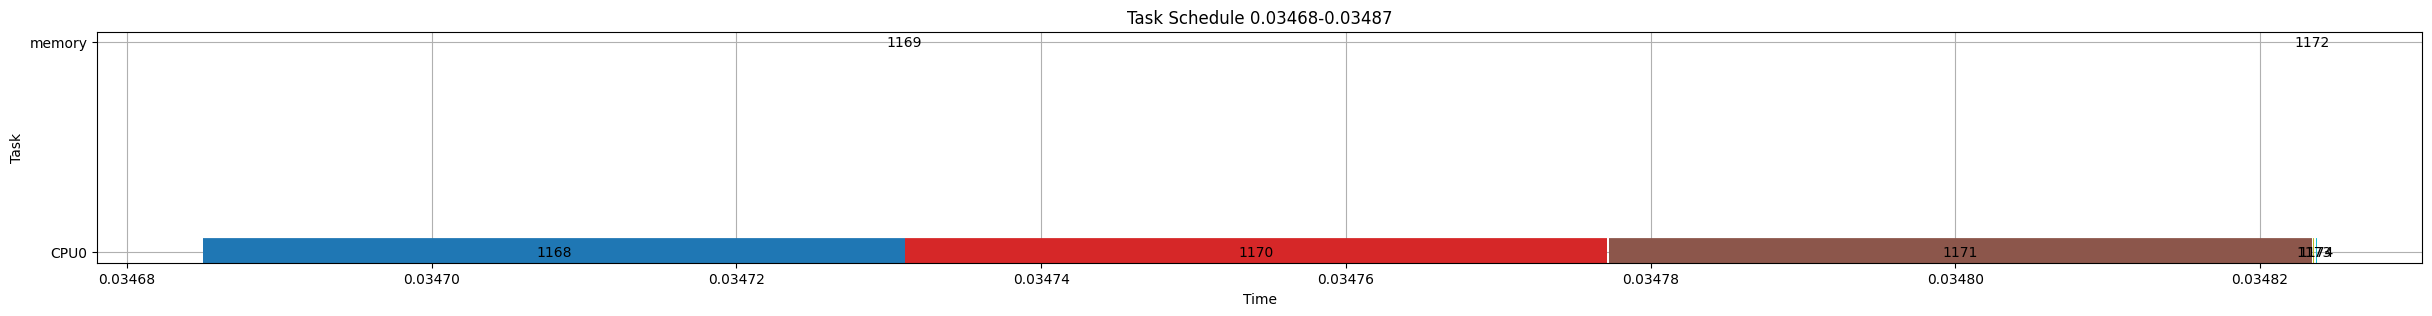

74
0.034869988799999946 - 0.03522399159999994
{'memory', 'CPU0', 'PHU0'}


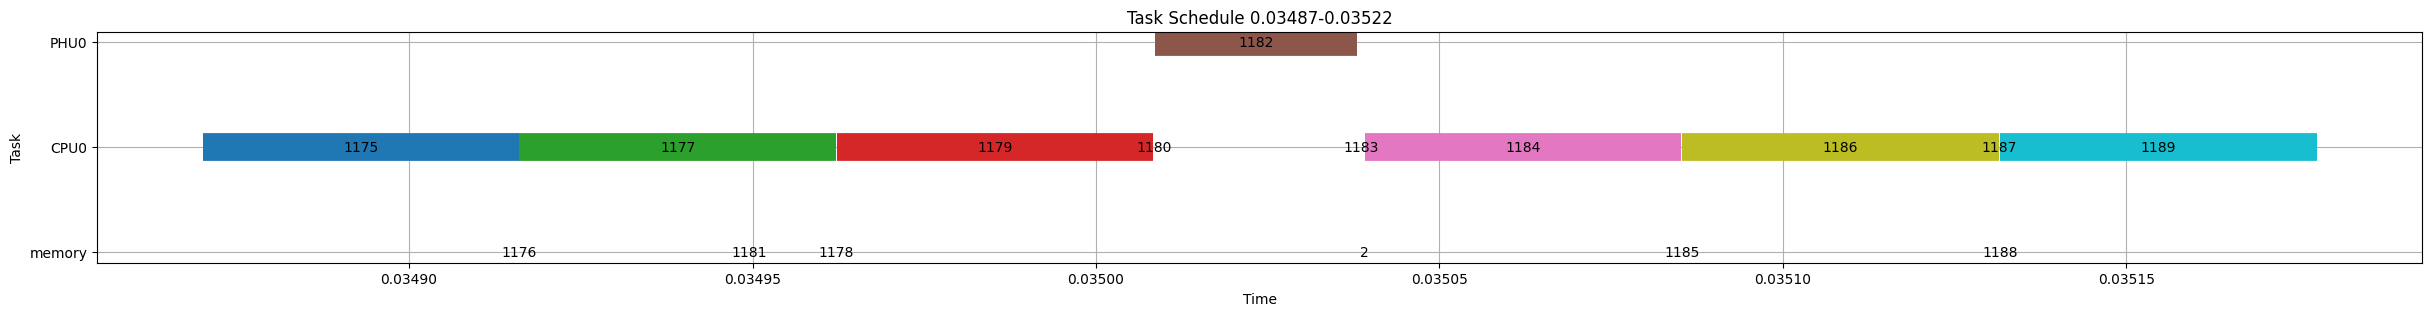

75
0.03522399159999994 - 0.03540867159999994
{'memory', 'CPU0', 'PHU0'}


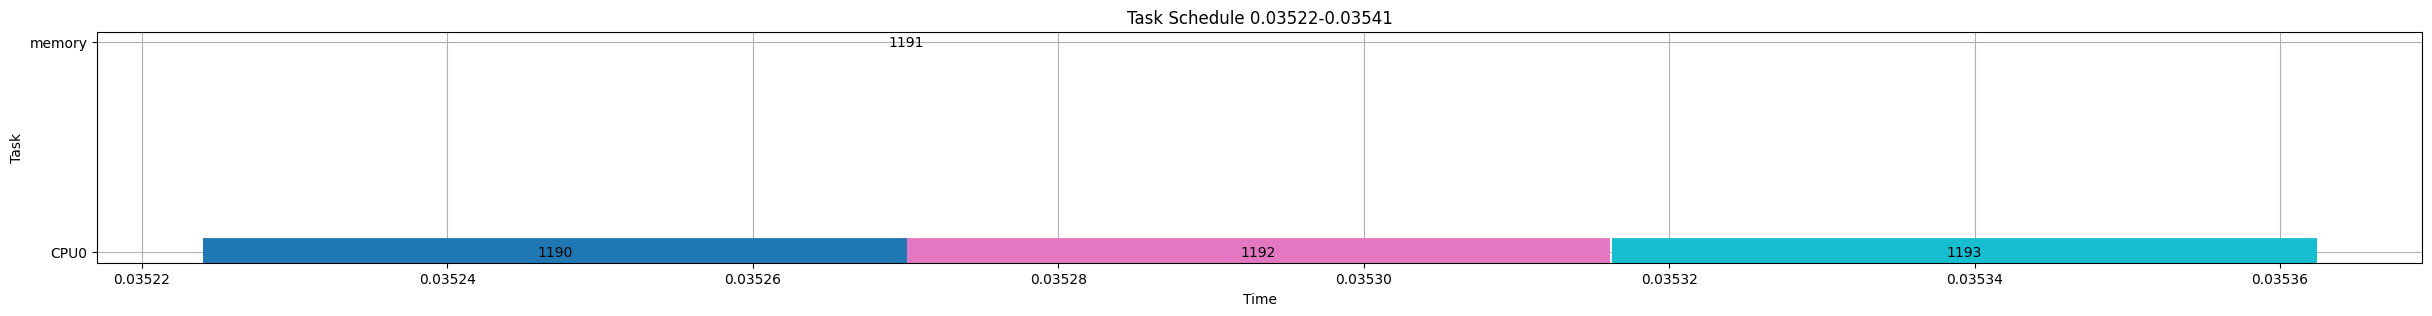

76
0.03540867159999994 - 0.03559367159999994
{'memory', 'CPU0', 'PHU0'}


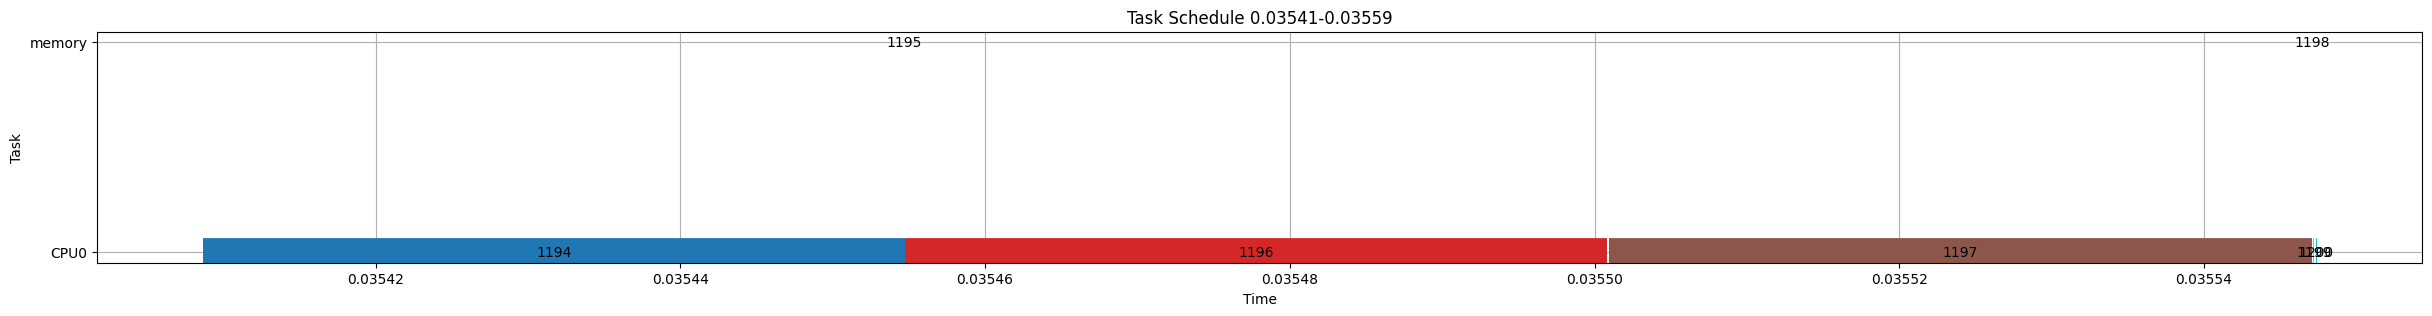

77
0.03559367159999994 - 0.036923250399999934
{'memory', 'CPU0', 'PHU0'}


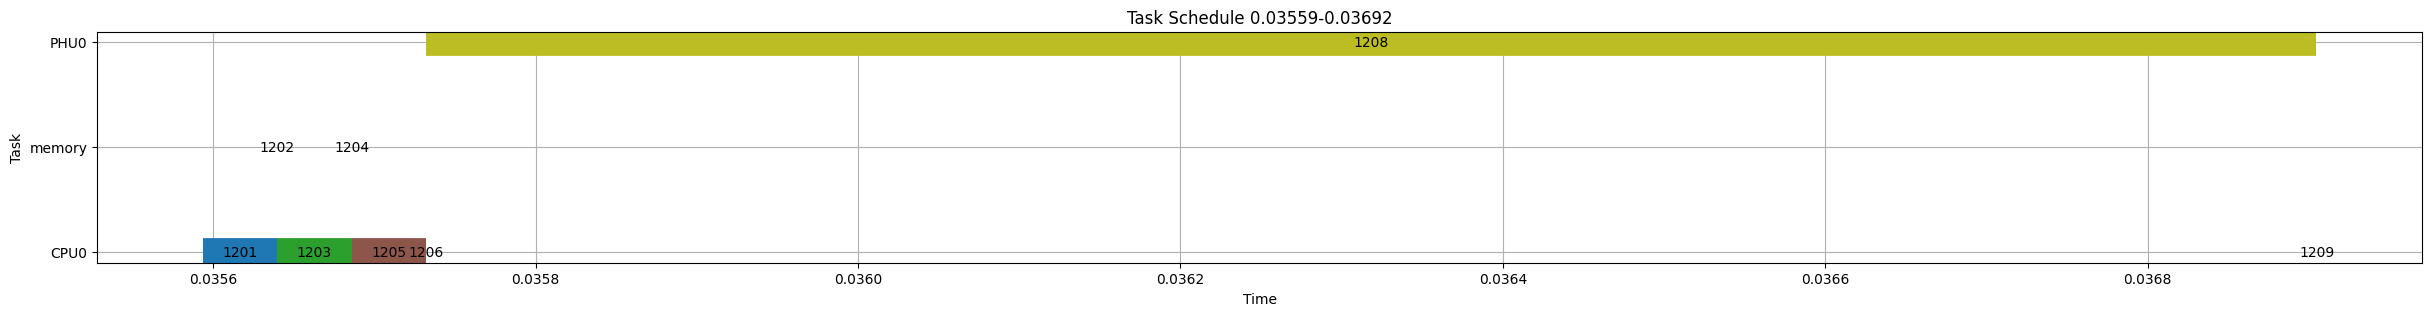

end_time=np.float64(0.03692)


In [8]:
# read_json_path = '/home/rjtomich/photonic_compiler/model_to_graph/gpt2_graph.json'
read_json_path = '/home/rjtomich/photonic_compiler/model_to_graph/bert-base-uncased_graph.json'
# read_json_path = '/home/rjtomich/photonic_compiler/Pytorch-LeNet/simple_LeNet_graph.json'
# read_json_path = '/home/rjtomich/photonic_compiler/Pytorch-LeNet/simple_LeNet_graph_NoFusion.json'
with open(read_json_path)  as json_file:
    raw_json = json.load(json_file) # returns json file as dict


graph = sg.StackedGraph(raw_json=raw_json)
# gv.adj_to_graph(graph.adj_matrix, save=True, layout = 'spectral')
subgraphs = list(dijk.graph_partition(graph))

dijk.select_nodes(graph, subgraphs)
end_time, break_points = dijk.schdeule_nodes(graph, subgraphs)

hardware = set()
for stack in graph.stack_list:
    # if stack.hardware_selection is None:
    #     print(stack)
    hardware.add(stack.hardware_selection)
    assert stack.hardware_selection is not None
print(hardware)

break_points.sort()
gv.make_schedule_diagram(graph, xlim_start=None, xlim_end=None)
# gv.make_schedule_diagram(graph, xlim_start=0, xlim_end=0.1)

# # PLOT EACH SUBSECTION
# for i in range(len(break_points)-1):
#     print(i)
#     print(f'{break_points[i]} - {break_points[i+1]}')
#     gv.make_schedule_diagram(graph, xlim_start=break_points[i], xlim_end=break_points[i+1])


print(f'{end_time=}')
# make_schedule_diagram(graph, xlim_start=0, xlim_end=0.01)


# 4 Memory Visualization

In [9]:
read_json_path = '/home/rjtomich/photonic_compiler/model_to_graph/gpt2_graph.json'
# read_json_path = '/home/rjtomich/photonic_compiler/model_to_graph/bert-base-uncased_graph.json'
# read_json_path = '/home/rjtomich/photonic_compiler/Pytorch-LeNet/simple_LeNet_graph.json'
# read_json_path = '/home/rjtomich/photonic_compiler/Pytorch-LeNet/simple_LeNet_graph_NoFusion.json'
with open(read_json_path)  as json_file:
    raw_json = json.load(json_file) # returns json file as dict


graph = sg.StackedGraph(raw_json=raw_json)
# gv.adj_to_graph(graph.adj_matrix, save=True, layout = 'spectral')
subgraphs = list(dijk.graph_partition(graph))

dijk.select_nodes(graph, subgraphs)
end_time, break_points = dijk.schdeule_nodes(graph, subgraphs)
break_points.sort()
print(f'{end_time=}')
schedule_data = graph.create_schedule_data()
dram, sram = dijk.get_memory_profile(graph)

end_time=np.float64(0.03312)


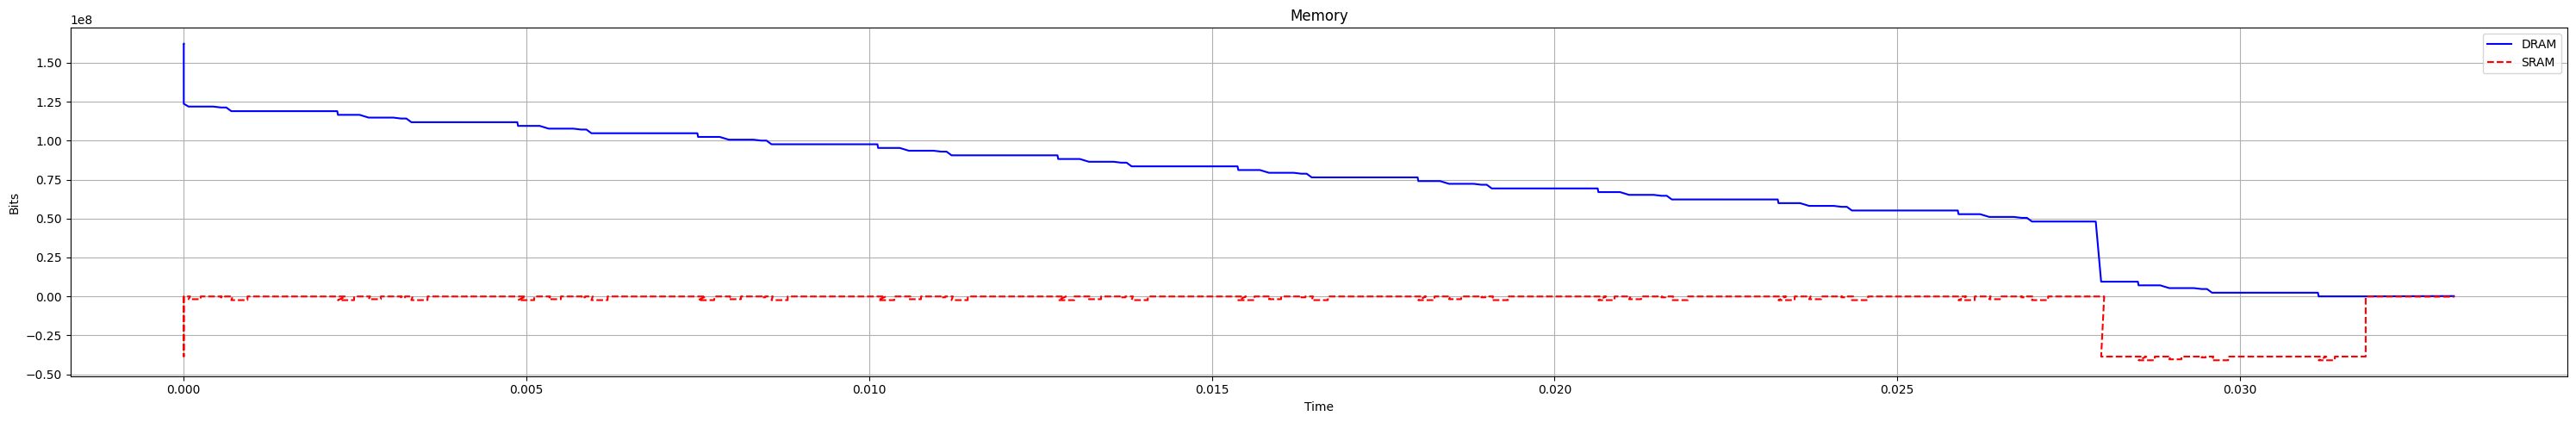

In [10]:
dram_t, dram_v = zip(*dram)
sram_t, sram_v = zip(*sram)

sram_v = [-v for v in sram_v]


plt.figure(figsize=(30, 5))  # Optional: Adjust figure size

plt.plot(dram_t, dram_v, linestyle='-', color='b', label='DRAM')
plt.plot(sram_t, sram_v, linestyle='--', color='r', label='SRAM')

plt.xlabel('Time')
plt.ylabel('Bits')
plt.title('Memory')
plt.legend()


plt.grid(True)
plt.tight_layout()

plt.show()